In [85]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pmdarima as pm
from functools import reduce
import seaborn as sns

%run Thesis_Model_Function.ipynb

Run Complete: 15/07/2024 14:26:20


Run Complete: 15/07/2024 14:26:21


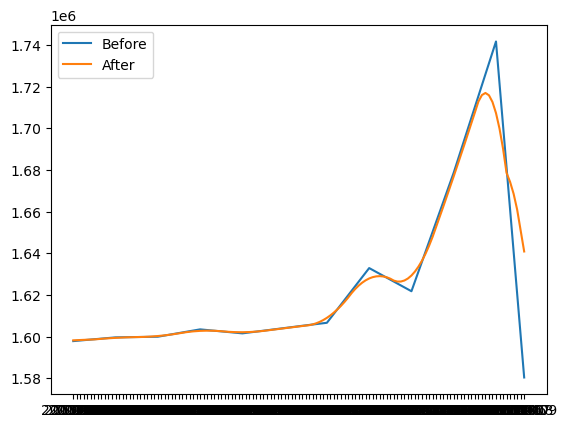

Run Complete: 15/07/2024 14:26:24


In [86]:
%run Thesis_SWE_Data_Prep.ipynb

## VARMAX Model Selection 

In [46]:
# Model Selection Needed
#  - No Exogenous variables pre COVID period - Best model - 3 common, 2 Regional, 6 AR, 2 MA
#  - With Exogenous variables pre-COVID period - Best model - 1 common, 2 regional,2 AR, 5 MA
#  - No Exogenous variables COVID period - Best model - 3 common, 2 Regional, 3 AR, 2 MA, smooth = False
#  - With Exogenous variables COVID period - Best model - 1 common , 1 regional, 3 AR ,4 MA
import numpy as np
import random

train_size = 60 # 84
regional_logmort_train = goth_logmort_full.iloc[:, :train_size]
country_logmort_train = all_swe_logmort.iloc[:, :train_size]
num_iters = 75
common_limit = 3
regional_limit = 3
ar_limit = 5
ma_limit = 5

track_params = np.full((common_limit+1, regional_limit+1, ar_limit+1, ma_limit+1), 0)
error_store = np.full((common_limit+1, regional_limit+1, ar_limit+1, ma_limit+1), np.inf)

for i in range(num_iters):
    # Initialize random parameters
    common_terms = random.randint(1, common_limit)
    regional_terms = random.randint(1, regional_limit)
    ar = random.randint(1, ar_limit)
    ma = random.randint(1, ma_limit)
    
    # Generate new parameters if already used
    while track_params[common_terms, regional_terms, ar, ma] == 1:
        common_terms = random.randint(1, common_limit)
        regional_terms = random.randint(1, regional_limit)
        ar = random.randint(1, ar_limit)
        ma = random.randint(1, ma_limit)
    
    try:
        # Train the model
        track_params[common_terms, regional_terms, ar, ma] = 1
        _, _, _, _, _, _, _, _, _, _, model, _, test_errors,_,_ = VARMAX_model(
            country_logmort_train, regional_logmort_train, 
            common_terms=common_terms, regional_terms=regional_terms, 
            prediction_period=20, train_period=40, AR=ar+1, MA=ma+1,
            
#            exogenous_train=exog_train_goth, exogenous_test=exog_test_goth,
#            country_deaths=swe_death, country_pop=swe_pop, 
#            region_deaths=goth_death, region_pop=goth_pop,
            
            exogenous_train=exog_train_goth_select, exogenous_test=exog_test_goth_select,
            country_deaths=swe_death_select, country_pop=swe_pop_select, 
            region_deaths=goth_death_select, region_pop=goth_pop_select,
            re_est=False,smooth = False)
        print(test_errors)
        # Store the mean of test_errors in the appropriate location
        error_store[common_terms, regional_terms, ar, ma] = np.mean(test_errors) 
    except Exception as e:
        print(f"Error in configuration: AR={ar+1}, MA={ma+1}, Common Terms={common_terms}, Regional Terms={regional_terms}. Error: {str(e)}")
        error_store[common_terms, regional_terms, ar, ma] = np.inf  # Set a large error value
                
    print(f"Configuration {i+1} processed: AR={ar+1}, MA={ma+1}, Common Terms={common_terms}, Regional Terms={regional_terms}, Error={error_store[common_terms, regional_terms, ar, ma]}")

    
    
    
print(np.where(error_store == np.min(error_store)))

[3.56497912 2.03356776 1.14943406 1.66232611 2.13579569]
Configuration 1 processed: AR=5, MA=2, Common Terms=3, Regional Terms=1, Error=2.1092205485581337
[3.94550719 1.52752783 1.48923293 1.63183356 2.69257292]
Configuration 2 processed: AR=3, MA=4, Common Terms=1, Regional Terms=3, Error=2.257334886691291
[2.93181166 1.96636784 1.3722194  1.42577653 2.6019324 ]
Configuration 3 processed: AR=5, MA=6, Common Terms=1, Regional Terms=3, Error=2.0596215655464576
[2.79206543 1.55702429 1.21958572 1.35608915 1.68934263]
Configuration 4 processed: AR=4, MA=2, Common Terms=1, Regional Terms=2, Error=1.7228214441213456
[6.59084894 2.89099643 3.202911   4.23936827 7.94580672]
Configuration 5 processed: AR=5, MA=5, Common Terms=3, Regional Terms=2, Error=4.973986272810102
[4.74815727 1.81401521 1.50494232 2.02884109 2.73625888]
Configuration 6 processed: AR=5, MA=6, Common Terms=2, Regional Terms=2, Error=2.5664429543948986
[3.05921258 1.95465906 0.95219898 1.87335958 2.63297382]
Configuration 7

In [47]:
np.min(error_store)

1.5435318491982244

In [ ]:
np.min(error_store)

In [ ]:
_, _, _, _, _, _, _, _, _, _, model, _, test_errors = VARMAX_model(
                        country_logmort_train, regional_logmort_train, 
                        common_terms=3, regional_terms=3, 
                        prediction_period=20, train_period=40, AR=2, MA=6,
                        #exogenous_train = exog_train_goth_select,exogenous_test = exog_test_goth_select,
                        country_deaths = swe_death_select,country_pop=swe_pop_select, region_deaths=goth_death_select,
                        region_pop=goth_pop_select, re_est=True)

print(np.mean(test_errors))

## SARIMAX Model Selection

In [ ]:
print(f"Lowest Error Configuration: Index: {index}, AR: {ar + 1}, MA: {ma + 1}, Common Terms: {common_terms}, Regional Terms: {regional_terms}")
print(ar+1,ma+1,common_terms,regional_terms)
np.min(error_store)


In [5]:
# Model Selection Needed
#  - No Exogenous variables pre COVID period - 2 Common, 2 Regional - no smoothing
#  - With Exogenous variables pre-COVID period - 1 common, 2 regional - no smoothing

#  - No Exogenous variables COVID period -  2 common, 1 regional
#  - With Exogenous variables COVID period - 2 common 1 regional

train_size =   60 #84
regional_logmort_train =  goth_logmort_incCOVID.iloc[:,:train_size] #goth_logmort_full.iloc[:,:train_size]
country_logmort_train =  all_swe_logmort_incCOVID.iloc[:,:train_size] # all_swe_logmort.iloc[:,:train_size]
exog_train =  exog_train_goth.iloc[:40,]# exog_train_goth_COVID.iloc[:60,] #exog_train_goth.iloc[:40,]
exog_test =   exog_train_goth.iloc[40:,] #exog_train_goth_COVID.iloc[60:,] #exog_train_goth.iloc[40:,]

error_store = np.zeros((4,4))

for com in range(1,5):
    for reg in range(1,5):
        _,_,_,_,_,_,_,_,_,_,_,regional_predictions,_,_,model_error,res,_,_ = full_model(country_logmort_train,regional_logmort_train,
                                                                                    common_terms = com,regional_terms = reg,
                                                                                    prediction_period = 20,train_period = 40,
                                                                                    exogenous_train = exog_train,exogenous_test = exog_test,
                                                                                    country_deaths = swe_death_select, country_pop = swe_pop_select,
                                                                                    region_deaths = goth_death_select,region_pop = goth_pop_select,
                                                                                    
                                                                                    #exogenous_train = exog_train,exogenous_test = exog_test,
                                                                                    #country_deaths=swe_death, country_pop=swe_pop, 
                                                                                    #region_deaths=goth_death, region_pop=goth_pop,
                                                                                    re_est = False,smooth = False) 
        
        regional_predictions = pd.DataFrame(regional_predictions)
        regional_predictions.index = regional_logmort_train.index
        regional_predictions.columns = regional_logmort_train.columns
        
        errors = MAPE(regional_predictions.iloc[:,40:],regional_logmort_train.iloc[:,40:])
        error_store[com-1,reg-1] = np.mean(errors)
        
        
        
print(error_store)

p_value k_t0 before re-estimation: 0.37490055412623635 

Regional k_t0 is white noise with LB p_value 0.37490055412623635 

p_value k_t0 after re-estimation: 0.37490055412623635 

Regional k_t0 is white noise with LB p_value 0.37490055412623635 

p_value k_t0 before re-estimation: 0.37490055412623635 

Regional k_t0 is white noise with LB p_value 0.37490055412623635 

p_value k_t1 before re-estimation: 0.23660086824198026 

Regional k_t1 is white noise with LB p_value 0.23660086824198026 

p_value k_t0 after re-estimation: 0.37490055412623635 

Regional k_t0 is white noise with LB p_value 0.37490055412623635 

p_value k_t1 after re-estimation: 0.23660086824198026 

Regional k_t1 is white noise with LB p_value 0.23660086824198026 

p_value k_t0 before re-estimation: 0.37490055412623635 

Regional k_t0 is white noise with LB p_value 0.37490055412623635 

p_value k_t1 before re-estimation: 0.23660086824198026 

Regional k_t1 is white noise with LB p_value 0.23660086824198026 

p_value k_t

## SARIMAX Models

# Testing model with no common parameters

In [87]:
# Model Selection Needed
#  - No Exogenous variables pre COVID period - 2 Regional
#  - With Exogenous variables pre-COVID period - 3 Regional
#  - No Exogenous variables COVID period - 2 Regional
#  - With Exogenous variables COVID period - 3 Regional - no smoothing

train_size =    60 #84
regional_logmort_train = goth_logmort_incCOVID.iloc[:,:train_size] #goth_logmort_full.iloc[:,:train_size]
country_logmort_train = all_swe_logmort_incCOVID.iloc[:,:train_size] #all_swe_logmort.iloc[:,:train_size]
exog_train = exog_train_goth.iloc[:40,] #exog_train_goth_COVID.iloc[:60,] #exog_train_goth.iloc[:40,]
exog_test = exog_train_goth.iloc[40:,] #exog_train_goth_COVID.iloc[60:,] #exog_train_goth.iloc[40:,]

error_store = np.zeros((2,5))

for com in range(1,3):
    for reg in range(1,6):
        
        if com == 1:
            smth = True
        else:
            smth = False
        _,_,_,_,_,_,regional_predictions,_,_,model_error,res,_ = model_no_common(regional_logmort_train,
                                                                               regional_terms = reg,
                                                                               prediction_period = 20,train_period = 40,
                                                                               region_deaths = goth_death,region_pop = goth_pop,
                                                                               #exogenous_train = exog_train,exogenous_test = exog_test,
                                                                               re_est = False,smooth = smth)
 
        
        regional_predictions = pd.DataFrame(regional_predictions)
        regional_predictions.index = regional_logmort_train.index
        regional_predictions.columns = regional_logmort_train.columns
        
        errors = MAPE(regional_predictions.iloc[:,40:],regional_logmort_train.iloc[:,40:])
        error_store[com-1,reg-1] = np.mean(errors)
        
        
        
print(error_store)

p_value k_t0 before re-estimation: 0.00010217303801255453 

Proportion of k_t values which are positive[0.575] 

Proportion of b_x values which are positive[0.2] 

p_value k_t0 after re-estimation: 0.026715386185843668 

p_value k_t0 before re-estimation: 0.00010217303801255453 

p_value k_t1 before re-estimation: 7.77070003060472e-24 

Proportion of k_t values which are positive[0.575 0.5  ] 

Proportion of b_x values which are positive[0.2 0.2] 

p_value k_t0 after re-estimation: 0.026715386185843668 

p_value k_t1 after re-estimation: 2.613734468293162e-08 

p_value k_t0 before re-estimation: 0.00010217303801255453 

p_value k_t1 before re-estimation: 7.77070003060472e-24 

p_value k_t2 before re-estimation: 8.365540472359306e-20 

Proportion of k_t values which are positive[0.575 0.5   0.475] 

Proportion of b_x values which are positive[0.2 0.2 0.6] 

p_value k_t0 after re-estimation: 0.026715386185843668 

p_value k_t1 after re-estimation: 2.613734468293162e-08 

p_value k_t2 aft

KeyboardInterrupt: 

p_value k_t0 before re-estimation: 0.48749525693234175 

Regional k_t0 is white noise with LB p_value 0.48749525693234175 

p_value k_t1 before re-estimation: 4.476456105524709e-12 

Proportion of k_t values which are positive[0.5  0.55] 

Proportion of b_x values which are positive[0.2 0.2] 

p_value k_t0 after re-estimation: 0.8730390034213504 

Regional k_t0 is white noise with LB p_value 0.8730390034213504 

p_value k_t1 after re-estimation: 1.1686796815042905e-10 

Model Error 6.704423562290362
Re_estimation error Each Age Group (MAPE): [0.04055434 0.49670443 0.7051447  0.51248868 0.85410141]

 Prediction Error Each Age Group (MAPE)[2.00474971 1.45398914 0.85732491 1.42014144 0.96821837]
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   60
Model:                        SARIMAX   Log Likelihood                  37.694
Date:                Mon, 15 Jul 2024   AIC                  

<Figure size 640x480 with 0 Axes>

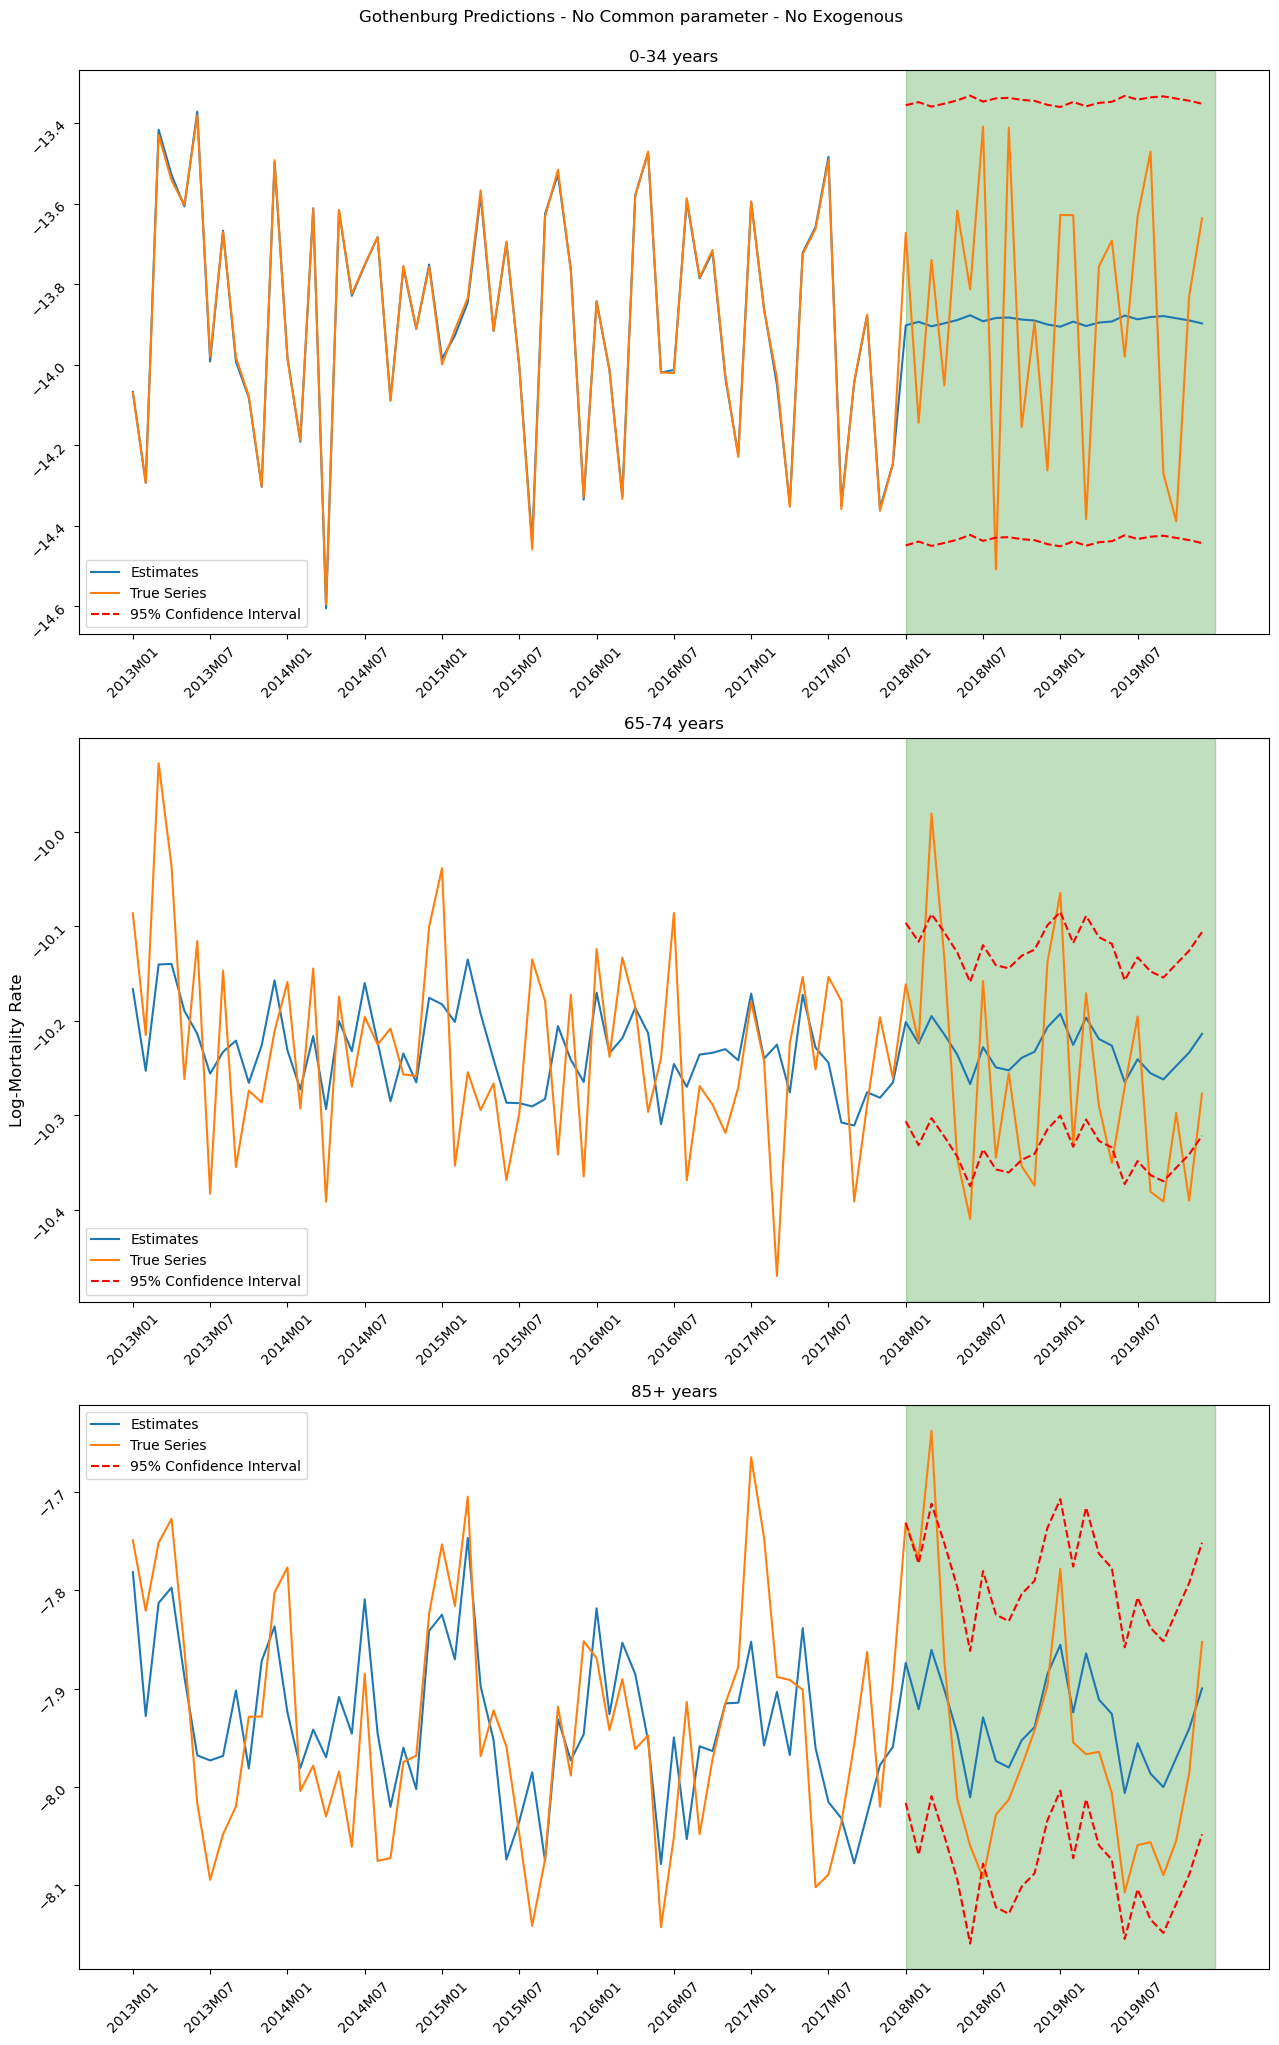

In [88]:
## Model No Common parameter - No Exogenous
a_xi,b_xs,k_ts,regional_re_est,k_t_models,k_t_preds,regional_predictions_nocommout,regional_predictions_upconf,regional_predictions_lowconf,model_error,res,_ = model_no_common(goth_logmort_full,regional_terms = 2,prediction_period = 24,train_period = 60,region_deaths = goth_death,region_pop = goth_pop,re_est = False,smooth = False)

#exogenous_train = exog_train_goth,exogenous_test = exog_test_goth
regional_predictions_nocommout = pd.DataFrame(regional_predictions_nocommout)
regional_predictions_upconf = pd.DataFrame(regional_predictions_upconf)
regional_predictions_lowconf = pd.DataFrame(regional_predictions_lowconf)

regional_predictions_nocommout.index = goth_logmort_full.index
regional_predictions_nocommout.columns = goth_logmort_full.columns
regional_predictions_upconf.index = goth_logmort_full.index
regional_predictions_upconf.columns = goth_logmort_full.columns
regional_predictions_lowconf.index = goth_logmort_full.index
regional_predictions_lowconf.columns = goth_logmort_full.columns

print("Model Error " + str(model_error))
print("Re_estimation error Each Age Group (MAPE): "+str(MAPE(regional_predictions_nocommout.iloc[:,:60],goth_logmort_full.iloc[:,:60])))

#AIC_values = [K_t_models["model_0"].aic(),K_t_models["model_1"].aic(),k_t_models["model_0"].aic(),k_t_models["model_1"].aic()]
#print("\n Model AIC Values [K_t1,K_t2,k_t1,k_t2]: \n"+ str(AIC_values))

print("\n Prediction Error Each Age Group (MAPE)" +str(MAPE(regional_predictions_nocommout.iloc[:,60:],goth_logmort_full.iloc[:,60:])))
print(k_t_models["model_0"].summary())

error_NoCom_wout = MAPE(regional_predictions_nocommout.iloc[:,60:],goth_logmort_full.iloc[:,60:])
prediction_plots(regional_predictions_nocommout.iloc[::2,:],regional_predictions_upconf.iloc[::2,:],regional_predictions_lowconf.iloc[::2,:],24,goth_logmort_full.iloc[::2,:],suptitle = "Gothenburg Predictions - No Common parameter - No Exogenous ")



In [89]:
print(k_t_models['model_0'].summary())
print(k_t_models['model_1'].summary())


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   60
Model:                        SARIMAX   Log Likelihood                  37.694
Date:                Mon, 15 Jul 2024   AIC                            -73.388
Time:                        14:27:53   BIC                            -71.294
Sample:                             0   HQIC                           -72.569
                                 - 60                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.0167      0.004      4.419      0.000       0.009       0.024
Ljung-Box (L1) (Q):                   0.19   Jarque-Bera (JB):                 2.28
Prob(Q):                              0.66   Pr

p_value k_t0 before re-estimation: 0.48749525693234175 

Regional k_t0 is white noise with LB p_value 0.48749525693234175 

p_value k_t1 before re-estimation: 4.476456105524709e-12 

p_value k_t2 before re-estimation: 4.187017477099278e-08 

Proportion of k_t values which are positive[0.5  0.55 0.55] 

Proportion of b_x values which are positive[0.2 0.2 0.4] 

p_value k_t0 after re-estimation: 0.8730390034213504 

Regional k_t0 is white noise with LB p_value 0.8730390034213504 

p_value k_t1 after re-estimation: 1.1686796815042905e-10 

p_value k_t2 after re-estimation: 0.29225879372280567 

Regional k_t2 is white noise with LB p_value 0.29225879372280567 

Model Error 7.074168165559839
Re_estimation error Each Age Group (MAPE): [0.04067564 0.10142075 0.7028549  0.44891374 0.35108733]

 Prediction Error Each Age Group (MAPE)[2.05326771 1.69886516 0.92061021 1.56516541 0.83625968]
                                 SARIMAX Results                                  
Dep. Variable:          

<Figure size 640x480 with 0 Axes>

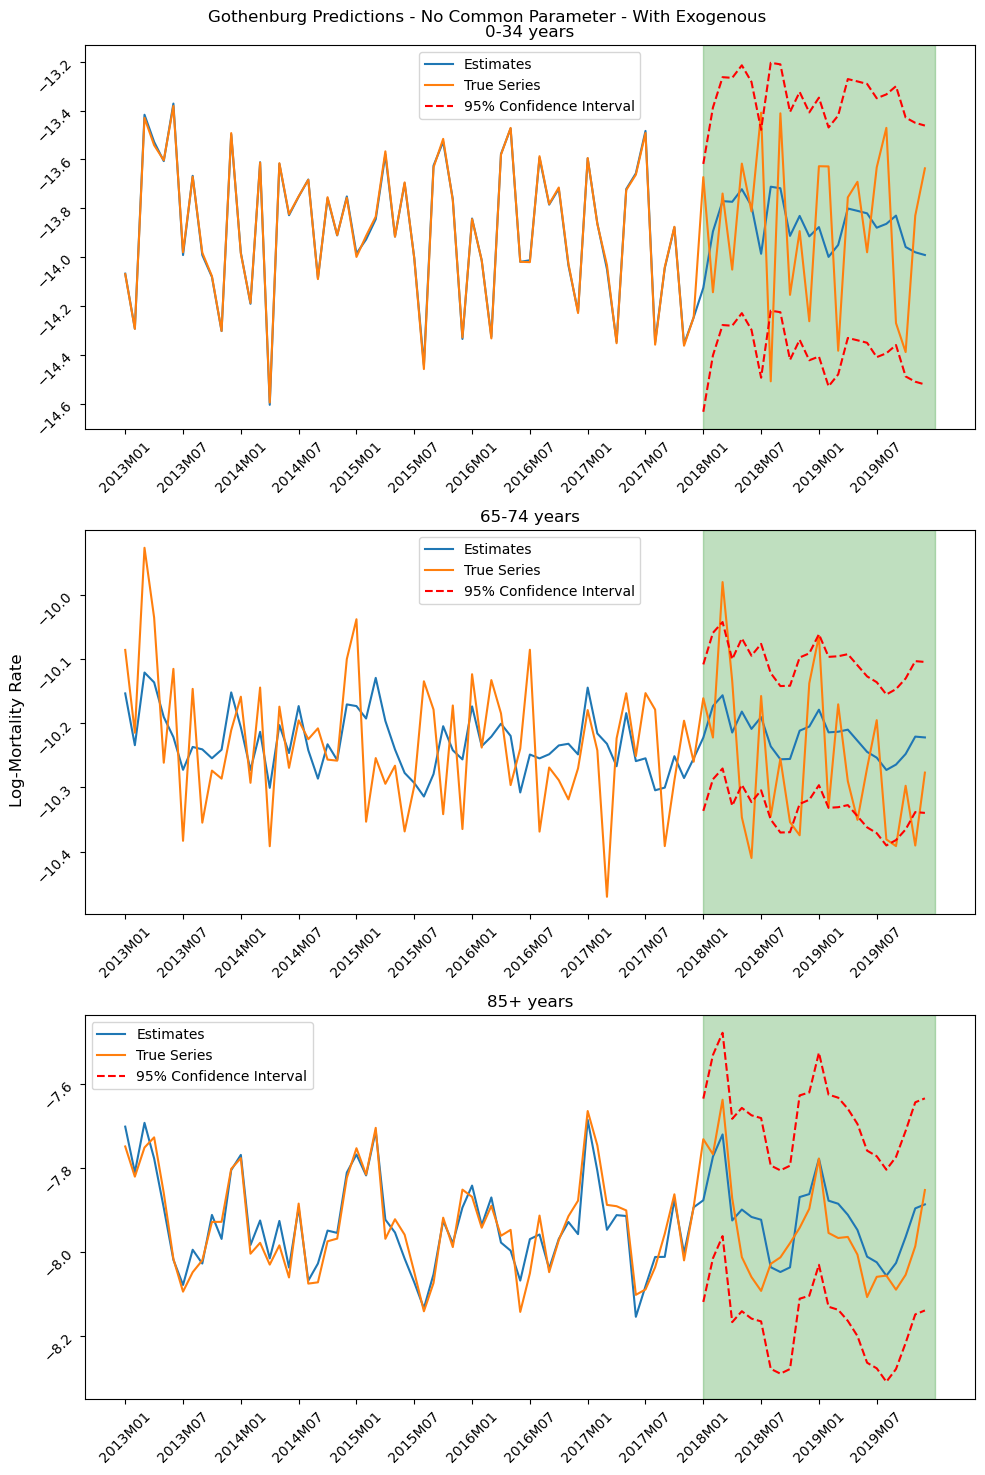

In [66]:
## Model No Common parameter - with Exogenous
a_xi,b_xs,k_ts,regional_re_est,k_t_models,k_t_preds,regional_predictions_nocommwith,regional_predictions_upconf,regional_predictions_lowconf,model_error,res,_ = model_no_common(goth_logmort_full,regional_terms = 3,prediction_period = 24,train_period = 60,exogenous_train = exog_train_goth,exogenous_test = exog_test_goth,region_deaths = goth_death,region_pop = goth_pop,re_est = False,smooth = False)

#exogenous_train = exog_train_goth,exogenous_test = exog_test_goth
regional_predictions_nocommwith = pd.DataFrame(regional_predictions_nocommwith)
regional_predictions_upconf = pd.DataFrame(regional_predictions_upconf)
regional_predictions_lowconf = pd.DataFrame(regional_predictions_lowconf)

regional_predictions_nocommwith.index = goth_logmort_full.index
regional_predictions_nocommwith.columns = goth_logmort_full.columns
regional_predictions_upconf.index = goth_logmort_full.index
regional_predictions_upconf.columns = goth_logmort_full.columns
regional_predictions_lowconf.index = goth_logmort_full.index
regional_predictions_lowconf.columns = goth_logmort_full.columns

print("Model Error " + str(model_error))
print("Re_estimation error Each Age Group (MAPE): "+str(MAPE(regional_predictions_nocommwith.iloc[:,:60],goth_logmort_full.iloc[:,:60])))

#AIC_values = [K_t_models["model_0"].aic(),K_t_models["model_1"].aic(),k_t_models["model_0"].aic(),k_t_models["model_1"].aic()]
#print("\n Model AIC Values [K_t1,K_t2,k_t1,k_t2]: \n"+ str(AIC_values))

print("\n Prediction Error Each Age Group (MAPE)" +str(MAPE(regional_predictions_nocommwith.iloc[:,60:],goth_logmort_full.iloc[:,60:])))
print(k_t_models["model_0"].summary())

error_NoCom_with = MAPE(regional_predictions_nocommwith.iloc[:,60:],goth_logmort_full.iloc[:,60:])
prediction_plots(regional_predictions_nocommwith.iloc[::2,:],regional_predictions_upconf.iloc[::2,:],regional_predictions_lowconf.iloc[::2,:],24,goth_logmort_full.iloc[::2,:],suptitle = "Gothenburg Predictions - No Common Parameter - With Exogenous ")



In [58]:
print(k_t_models['model_0'].summary())
print(k_t_models['model_1'].summary())
print(k_t_models['model_2'].summary())

                                 SARIMAX Results                                  
Dep. Variable:                          y   No. Observations:                   60
Model:             SARIMAX(0, 0, [1], 12)   Log Likelihood                  41.621
Date:                    Wed, 10 Jul 2024   AIC                            -67.242
Time:                            16:25:15   BIC                            -50.487
Sample:                                 0   HQIC                           -60.688
                                     - 60                                         
Covariance Type:                      opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.2358      0.189     -1.248      0.212      -0.606       0.135
av_temp       -0.0053      0.005     -1.167      0.243      -0.014       0.004
av_humid       0.003

# SARIMAX Models pre-COVID With Common terms

p_value k_t0 before re-estimation: 0.8019348686666993 

Regional k_t0 is white noise with LB p_value 0.8019348686666993 

p_value k_t1 before re-estimation: 0.04050338645308711 

p_value k_t0 after re-estimation: 0.8019348686666993 

Regional k_t0 is white noise with LB p_value 0.8019348686666993 

p_value k_t1 after re-estimation: 0.04050338645308705 

Model Error 3.362620469292128
Re_estimation error Each Age Group (MAPE): [0.05185945 0.14060643 0.73599701 0.51745257 0.76947005]

 Prediction Error Each Age Group (MAPE)[2.13007142 1.34271916 0.84491116 1.14052763 0.65352979]


<Figure size 640x480 with 0 Axes>

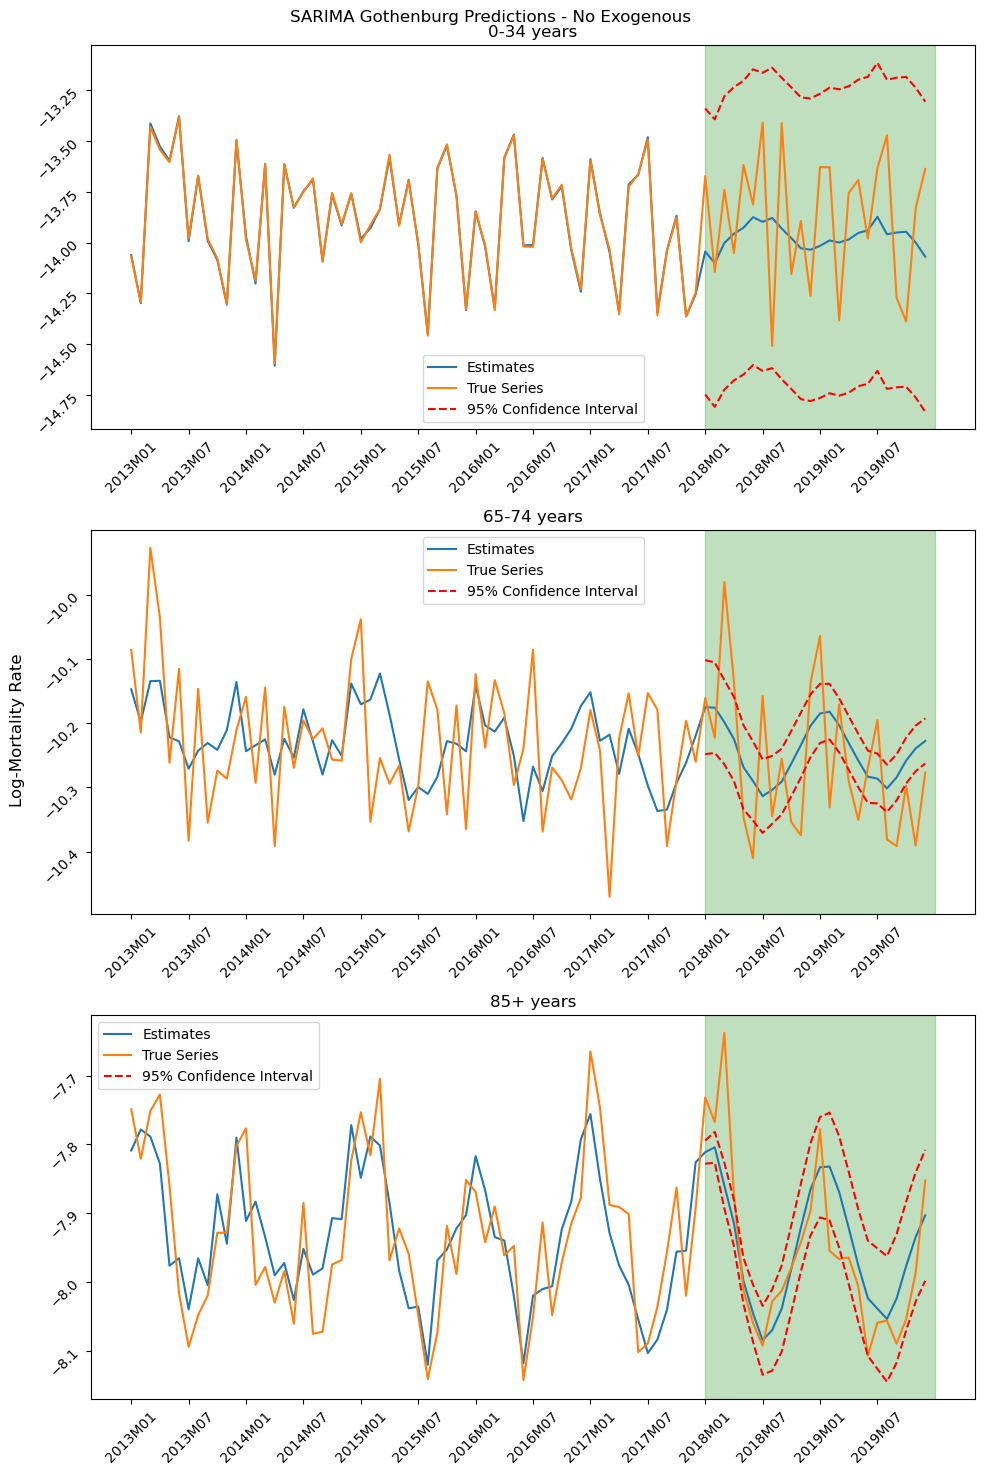

In [67]:
### Without Exogenous
a_xi,B_xs,K_ts,b_xs,k_ts,country_re_est,regional_re_est,K_t_models,k_t_models,K_t_preds,k_t_preds,regional_predictions_sarout,regional_predictions_upconf,regional_predictions_lowconf,model_error,res,_,_ = full_model(all_swe_logmort,goth_logmort_full, common_terms = 2,regional_terms = 2,prediction_period = 24,train_period = 60,country_deaths = swe_death, country_pop = swe_pop,region_deaths = goth_death,region_pop = goth_pop,re_est = False,smooth = False)  


regional_predictions_sarout = pd.DataFrame(regional_predictions_sarout)
regional_predictions_upconf = pd.DataFrame(regional_predictions_upconf)
regional_predictions_lowconf = pd.DataFrame(regional_predictions_lowconf)

regional_predictions_sarout.index = goth_logmort_full.index
regional_predictions_sarout.columns = goth_logmort_full.columns
regional_predictions_upconf.index = goth_logmort_full.index
regional_predictions_upconf.columns = goth_logmort_full.columns
regional_predictions_lowconf.index = goth_logmort_full.index
regional_predictions_lowconf.columns = goth_logmort_full.columns

print("Model Error " + str(model_error))
print("Re_estimation error Each Age Group (MAPE): "+str(MAPE(regional_predictions_sarout.iloc[:,:60],goth_logmort_full.iloc[:,:60])))

#AIC_values = [K_t_models["model_0"].aic(),K_t_models["model_1"].aic(),k_t_models["model_0"].aic(),k_t_models["model_1"].aic()]
#print("\n Model AIC Values [K_t1,K_t2,k_t1,k_t2]: \n"+ str(AIC_values))

print("\n Prediction Error Each Age Group (MAPE)" +str(MAPE(regional_predictions_sarout.iloc[:,60:],goth_logmort_full.iloc[:,60:])))

error_SARIMAX_wout = MAPE(regional_predictions_sarout.iloc[:,60:],goth_logmort_full.iloc[:,60:])
prediction_plots(regional_predictions_sarout.iloc[::2,:],regional_predictions_upconf.iloc[::2,:],regional_predictions_lowconf.iloc[::2,:],24,goth_logmort_full.iloc[::2,:],suptitle = "SARIMA Gothenburg Predictions - No Exogenous")



In [28]:
print(str(K_t_models["model_0"].get_params()["order"]) + str(K_t_models["model_0"].get_params()["seasonal_order"]))
print(str(K_t_models["model_1"].get_params()["order"]) + str(K_t_models["model_1"].get_params()["seasonal_order"]))

print(str(k_t_models["model_0"].get_params()["order"]) + str(k_t_models["model_0"].get_params()["seasonal_order"]))
print(str(k_t_models["model_1"].get_params()["order"]) + str(k_t_models["model_1"].get_params()["seasonal_order"]))


(1, 0, 0)(2, 0, 1, 12)
(0, 1, 1)(1, 0, 2, 12)
(0, 0, 1)(1, 0, 1, 12)
(0, 0, 0)(0, 0, 0, 12)


p_value k_t0 before re-estimation: 0.5126171522950828 

Regional k_t0 is white noise with LB p_value 0.5126171522950828 

p_value k_t1 before re-estimation: 0.05292492751953591 

Regional k_t1 is white noise with LB p_value 0.05292492751953591 

p_value k_t0 after re-estimation: 0.5126171522950828 

Regional k_t0 is white noise with LB p_value 0.5126171522950828 

p_value k_t1 after re-estimation: 0.05292492751953591 

Regional k_t1 is white noise with LB p_value 0.05292492751953591 

Re_estimation error Each Age Group (MAPE): [0.07439633 0.18736019 0.72782341 0.49800751 0.78748566]

 Prediction Error Each Age Group (MAPE)[1.88669729 1.6836709  0.89297882 1.5084475  0.72984085]


<Figure size 640x480 with 0 Axes>

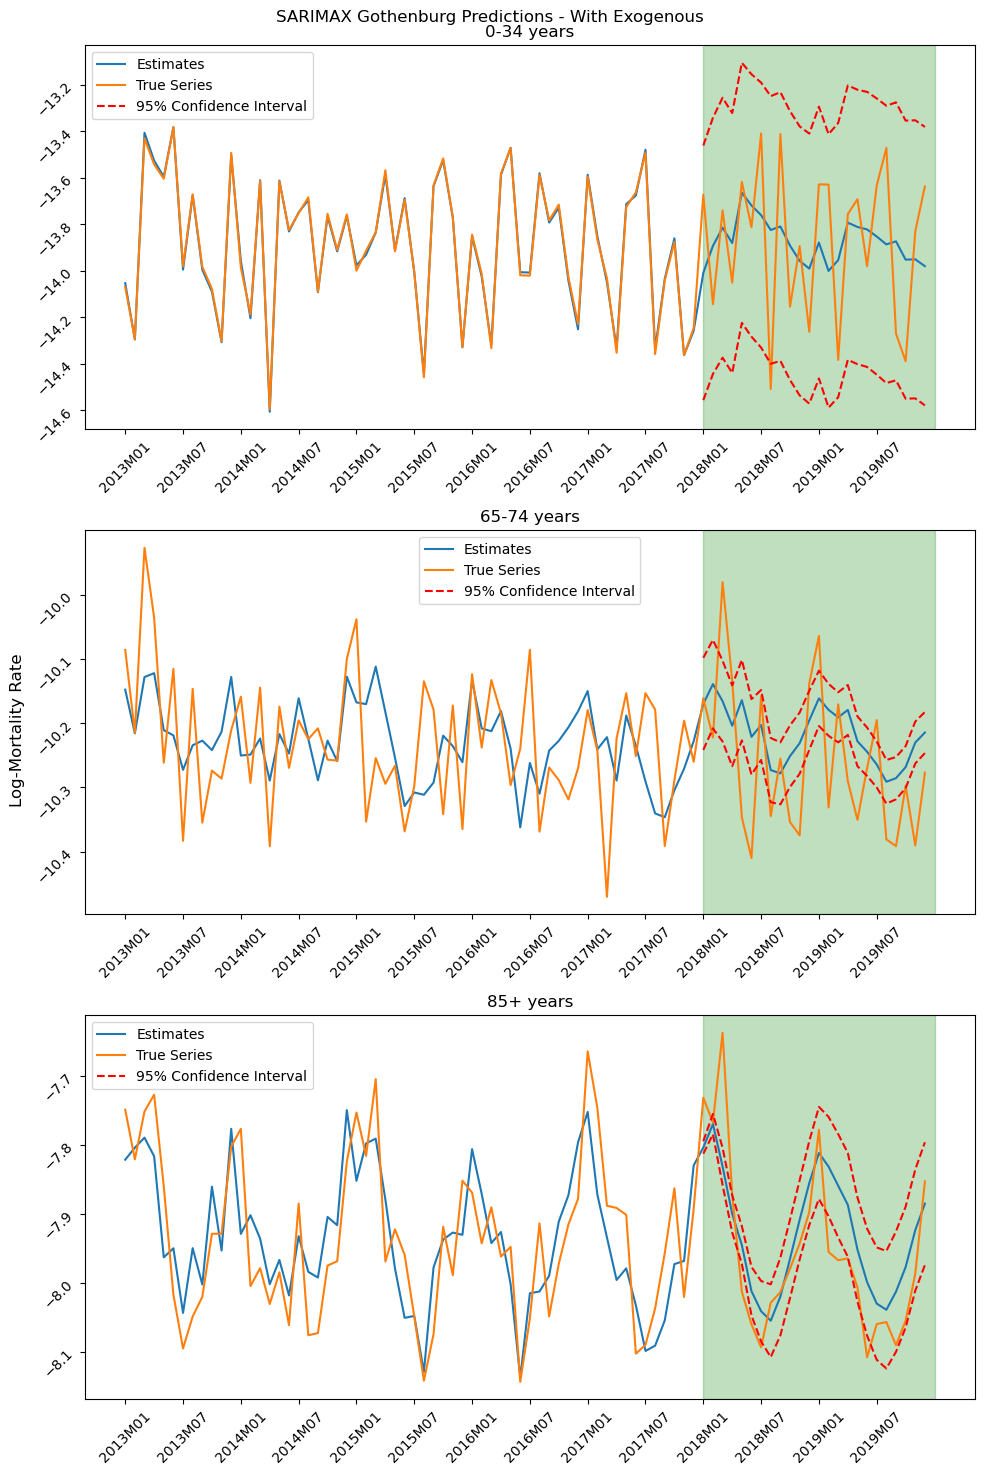

In [68]:
### With Exogenous
a_xi,B_xs,K_ts,b_xs,k_ts,country_re_est,regional_re_est,K_t_models,k_t_models,K_t_preds,k_t_preds,regional_predictions_sarwith,regional_predictions_upconf,regional_predictions_lowconf,model_error,res,_,_ = full_model(all_swe_logmort,goth_logmort_full, common_terms = 1,regional_terms = 2,prediction_period = 24,train_period = 60,exogenous_train = exog_train_goth,exogenous_test = exog_test_goth,country_deaths = swe_death, country_pop = swe_pop,region_deaths = goth_death,region_pop = goth_pop,re_est = False,smooth=False)  


regional_predictions_sarwith = pd.DataFrame(regional_predictions_sarwith)
regional_predictions_upconf = pd.DataFrame(regional_predictions_upconf)
regional_predictions_lowconf = pd.DataFrame(regional_predictions_lowconf)

regional_predictions_sarwith.index = goth_logmort_full.index
regional_predictions_sarwith.columns = goth_logmort_full.columns
regional_predictions_upconf.index = goth_logmort_full.index
regional_predictions_upconf.columns = goth_logmort_full.columns
regional_predictions_lowconf.index = goth_logmort_full.index
regional_predictions_lowconf.columns = goth_logmort_full.columns

print("Re_estimation error Each Age Group (MAPE): "+str(MAPE(regional_predictions_sarwith.iloc[:,:60],goth_logmort_full.iloc[:,:60])))

#AIC_values = [K_t_models["model_0"].aic(),K_t_models["model_1"].aic(),k_t_models["model_0"].aic(),k_t_models["model_1"].aic()]
#print("\n Model AIC Values [K_t1,K_t2,k_t1,k_t2]: \n"+ str(AIC_values))

print("\n Prediction Error Each Age Group (MAPE)" +str(MAPE(regional_predictions_sarwith.iloc[:,60:],goth_logmort_full.iloc[:,60:])))

#print(str(k_t_models["model_0"].summary()))
#print(k_t_models["model_1"].summary())
error_SARIMAX_w= MAPE(regional_predictions_sarwith.iloc[:,60:],goth_logmort_full.iloc[:,60:])

prediction_plots(regional_predictions_sarwith.iloc[::2,:],regional_predictions_upconf.iloc[::2,:],regional_predictions_lowconf.iloc[::2,:],24,goth_logmort_full.iloc[::2,:],suptitle = "SARIMAX Gothenburg Predictions - With Exogenous")



In [35]:
print(str(K_t_models["model_0"].get_params()["order"]) + str(K_t_models["model_0"].get_params()["seasonal_order"]))
print(str(K_t_models["model_1"].get_params()["order"]) + str(K_t_models["model_1"].get_params()["seasonal_order"]))
print(str(K_t_models["model_2"].get_params()["order"]) + str(K_t_models["model_2"].get_params()["seasonal_order"]))
print(str(K_t_models["model_3"].get_params()["order"]) + str(K_t_models["model_3"].get_params()["seasonal_order"]))

print("-")
print(str(k_t_models["model_0"].get_params()["order"]) + str(k_t_models["model_0"].get_params()["seasonal_order"]))
print(str(k_t_models["model_1"].get_params()["order"]) + str(k_t_models["model_1"].get_params()["seasonal_order"]))


(3, 0, 1)(1, 0, 1, 12)
(3, 1, 1)(2, 0, 0, 12)
(0, 1, 1)(0, 0, 0, 12)
(0, 0, 0)(0, 0, 0, 12)
-
(0, 0, 0)(0, 0, 0, 12)
(0, 0, 0)(0, 0, 1, 12)


## VARMAX Models

test_errors[1.93151945 1.94859242 1.03286127 1.96854928 1.51742459]


<Figure size 640x480 with 0 Axes>

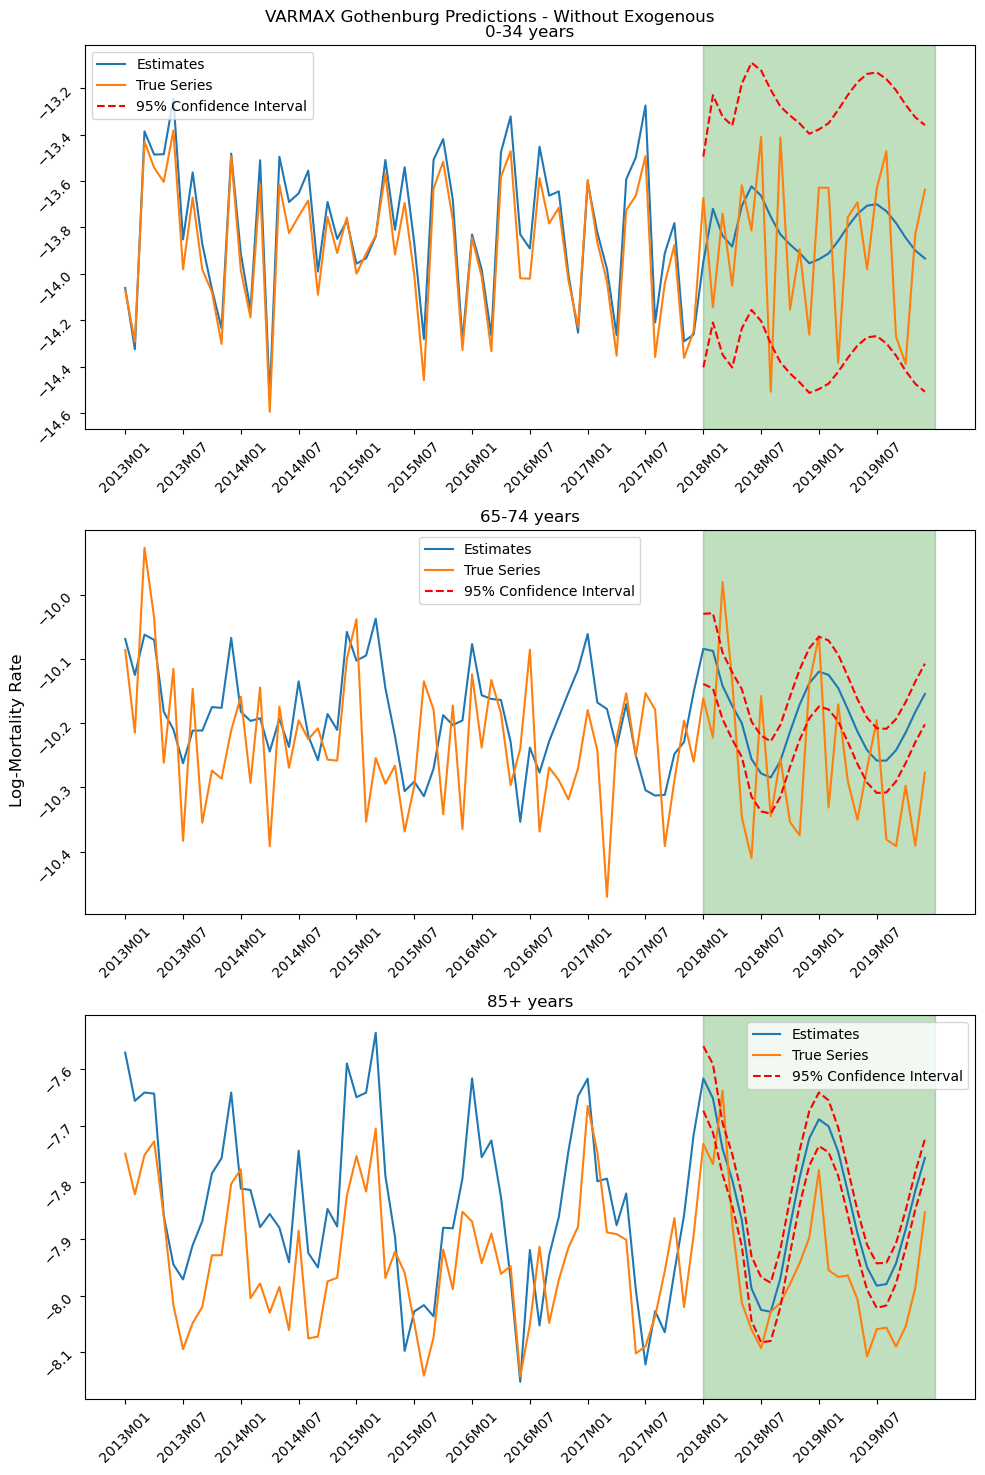

In [69]:
### Without Exogenous
all_k_t, K_ts,k_ts,B_xs,b_xs,a_xi,all_k_preds,predictions_varout,predictions_lowconf,predictions_upconf,model_VAR_wout,aic,error_VAR_wout,_,_ = VARMAX_model(all_swe_logmort,goth_logmort_full, common_terms = 1,regional_terms = 2,prediction_period = 24,train_period = 60,AR= 5,MA = 5,country_deaths = swe_death,country_pop = swe_pop,region_deaths = goth_death,region_pop = goth_pop,re_est = False,smooth = False)

print("test_errors" + str(error_VAR_wout))
prediction_plots(predictions_varout.iloc[::2,:],predictions_lowconf.iloc[::2,:],predictions_upconf.iloc[::2,:],24,goth_logmort_full.iloc[::2,:],suptitle = "VARMAX Gothenburg Predictions - Without Exogenous")



test_errors[2.17665471 1.91671536 1.03469555 2.00850334 1.6731139 ]


<Figure size 640x480 with 0 Axes>

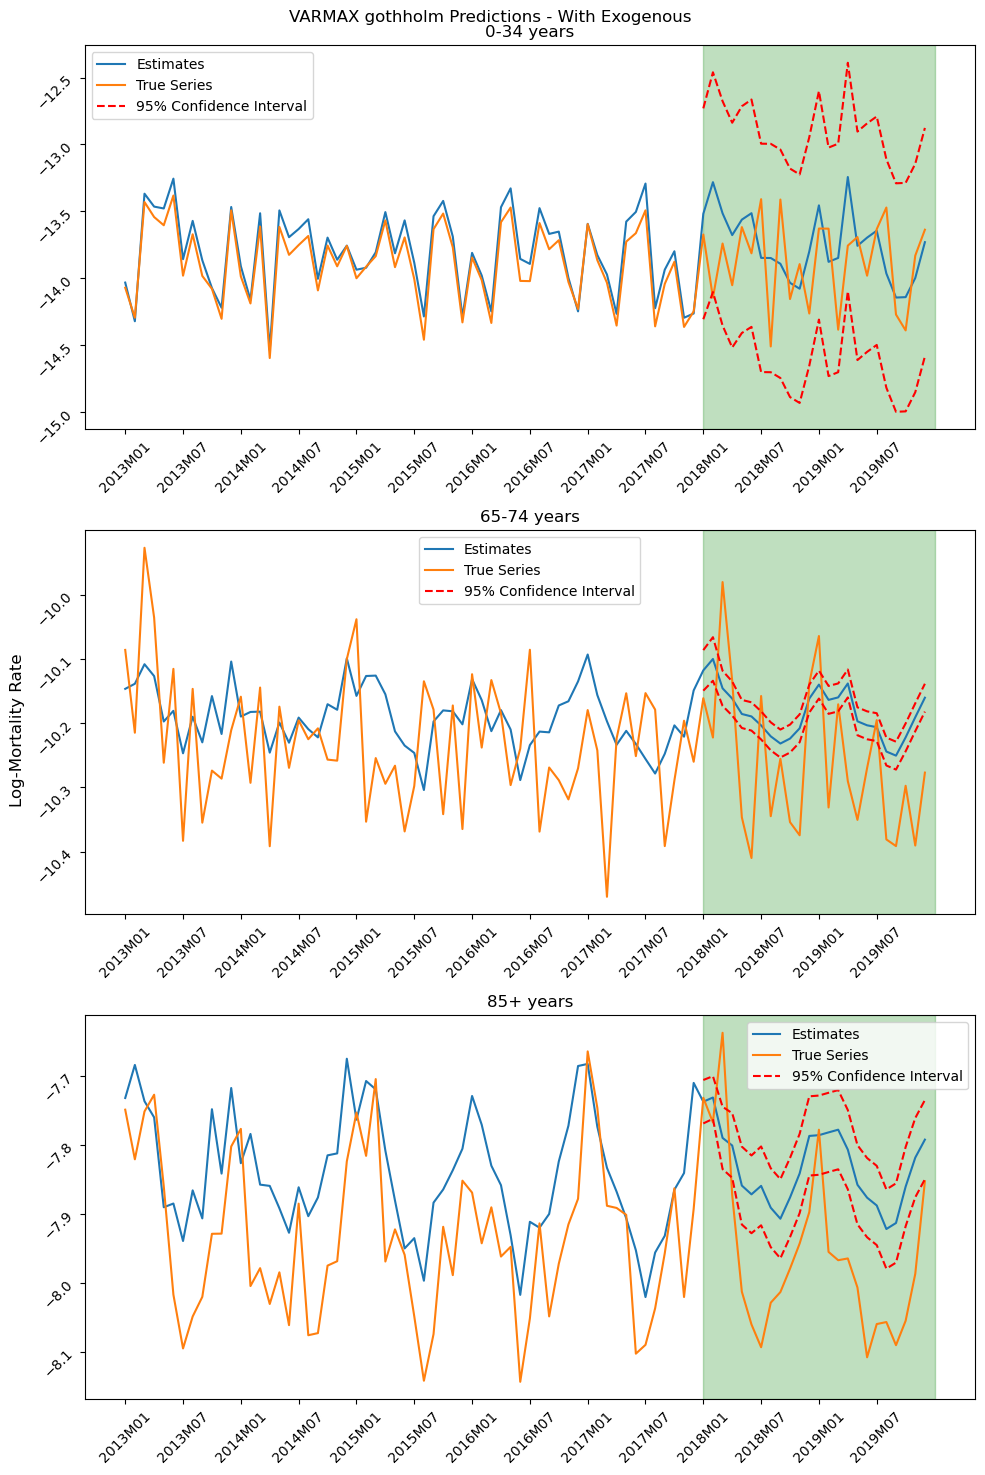

In [70]:
### With Exogenous
all_k_t, K_ts,k_ts,B_xs,b_xs,a_xi,all_k_preds,predictions_varwith,predictions_lowconf,predictions_upconf,model_VAR_with,aic,error_VAR_w,_,_ = VARMAX_model(all_swe_logmort,goth_logmort_full, common_terms = 1,regional_terms = 1,prediction_period = 24,train_period = 60,AR= 2,MA = 5,exogenous_train = exog_train_goth,exogenous_test = exog_test_goth,country_deaths = swe_death,country_pop = swe_pop,region_deaths = goth_death,region_pop = goth_pop,re_est = False)

print("test_errors" + str(error_VAR_w))
prediction_plots(predictions_varwith.iloc[::2,:],predictions_lowconf.iloc[::2,:],predictions_upconf.iloc[::2,:],24,goth_logmort_full.iloc[::2,:],suptitle = "VARMAX gothholm Predictions - With Exogenous")



In [ ]:
model_VAR_with.summary()

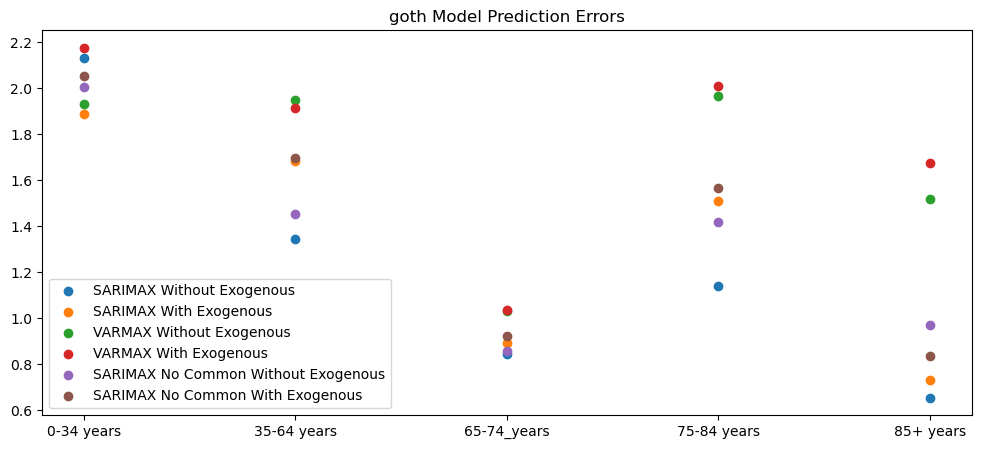

In [71]:
test_errors = np.vstack((error_SARIMAX_wout,error_SARIMAX_w,error_VAR_wout,error_VAR_w,error_NoCom_wout,error_NoCom_with))
goth = test_errors

age_groups = ["0-34 years","35-64 years","65-74_years","75-84 years","85+ years"]
plt.figure(figsize = (12,5))
plt.scatter(age_groups,goth[0,:],label = "SARIMAX Without Exogenous")
plt.scatter(age_groups,goth[1,:],label = "SARIMAX With Exogenous")
plt.scatter(age_groups,goth[2,:],label = "VARMAX Without Exogenous")
plt.scatter(age_groups,goth[3,:],label = "VARMAX With Exogenous")
plt.scatter(age_groups,goth[4,:],label = "SARIMAX No Common Without Exogenous")
plt.scatter(age_groups,goth[5,:],label = "SARIMAX No Common With Exogenous")
plt.legend();
plt.title("goth Model Prediction Errors");

In [23]:
np.mean(goth,axis = 1)

array([1.79192407, 1.97025835, 2.3677427 , 2.46768789, 1.98723707,
       2.08301537])

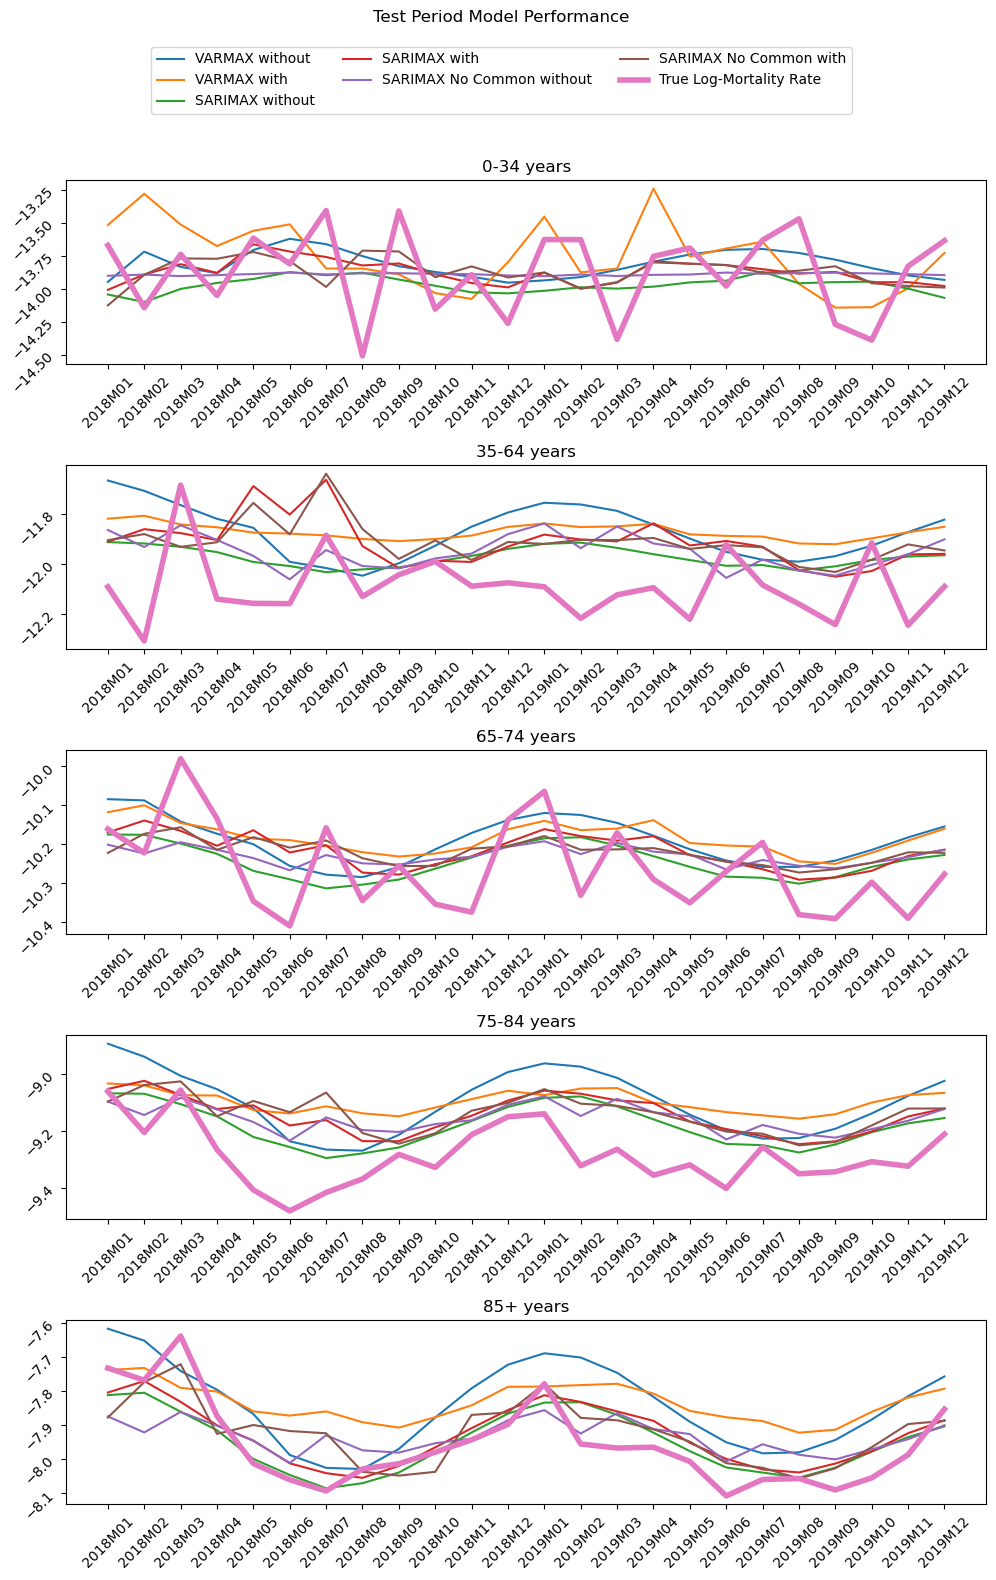

In [72]:
predictions_varwith = pd.DataFrame(predictions_varwith)
predictions_varwith.index = goth_logmort_full.index
predictions_varwith.columns = goth_logmort_full.columns

predictions_varout = pd.DataFrame(predictions_varout)
predictions_varout.index = goth_logmort_full.index
predictions_varout.columns = goth_logmort_full.columns


age_groups = ["0-34 years", "35-64 years", "65-74 years", "75-84 years", "85+ years"]
fig, axes = plt.subplots(nrows=5, ncols=1, figsize=(10, 15))

# Store lines and labels to create a single legend
lines = []
labels = []

for row in range(5):
    age = age_groups[row]
    axes[row].set_title(age)
    
    line1, = axes[row].plot(predictions_varout.iloc[row, 60:], label="VARMAX without")
    line2, = axes[row].plot(predictions_varwith.iloc[row, 60:], label="VARMAX with")
    line3, = axes[row].plot(regional_predictions_sarout.iloc[row, 60:], label="SARIMAX without")
    line4, = axes[row].plot(regional_predictions_sarwith.iloc[row, 60:], label="SARIMAX with")
    line5, = axes[row].plot(regional_predictions_nocommout.iloc[row, 60:], label="SARIMAX No Common without")
    line6, = axes[row].plot(regional_predictions_nocommwith.iloc[row, 60:], label="SARIMAX No Common with")
    line7, = axes[row].plot(goth_logmort_full.iloc[row, 60:], label="True Log-Mortality Rate", linewidth=4)
    
    axes[row].tick_params(rotation=45)
    
    # Collect lines and labels for the legend
    if row == 0:
        lines.extend([line1, line2, line3, line4, line5, line6, line7])
        labels.extend([line.get_label() for line in lines])

# Create a single legend
fig.legend(lines, labels, loc='upper center', bbox_to_anchor=(0.5, 1.03), ncol=3)
plt.suptitle("Test Period Model Performance", y=1.05)
plt.tight_layout(rect=[0, 0, 1, 0.98])
plt.show()

# COVID Period Modelling

p_value k_t0 before re-estimation: 0.7278170672018842 

Regional k_t0 is white noise with LB p_value 0.7278170672018842 

p_value k_t1 before re-estimation: 2.0921643199900074e-29 

Proportion of k_t values which are positive[0.47619048 0.51190476] 

Proportion of b_x values which are positive[0.2 0.2] 

p_value k_t0 after re-estimation: 0.9523432549049936 

Regional k_t0 is white noise with LB p_value 0.9523432549049936 

p_value k_t1 after re-estimation: 1.4799456185462643e-11 

Model Error 6.305082216528625
Re_estimation error Each Age Group (MAPE): [0.02972516 0.54583996 0.64594207 0.5397266  0.92163412]

 Prediction Error Each Age Group (MAPE)[1.94445303 0.95459033 1.09988281 0.88739533 1.41876073]


<Figure size 640x480 with 0 Axes>

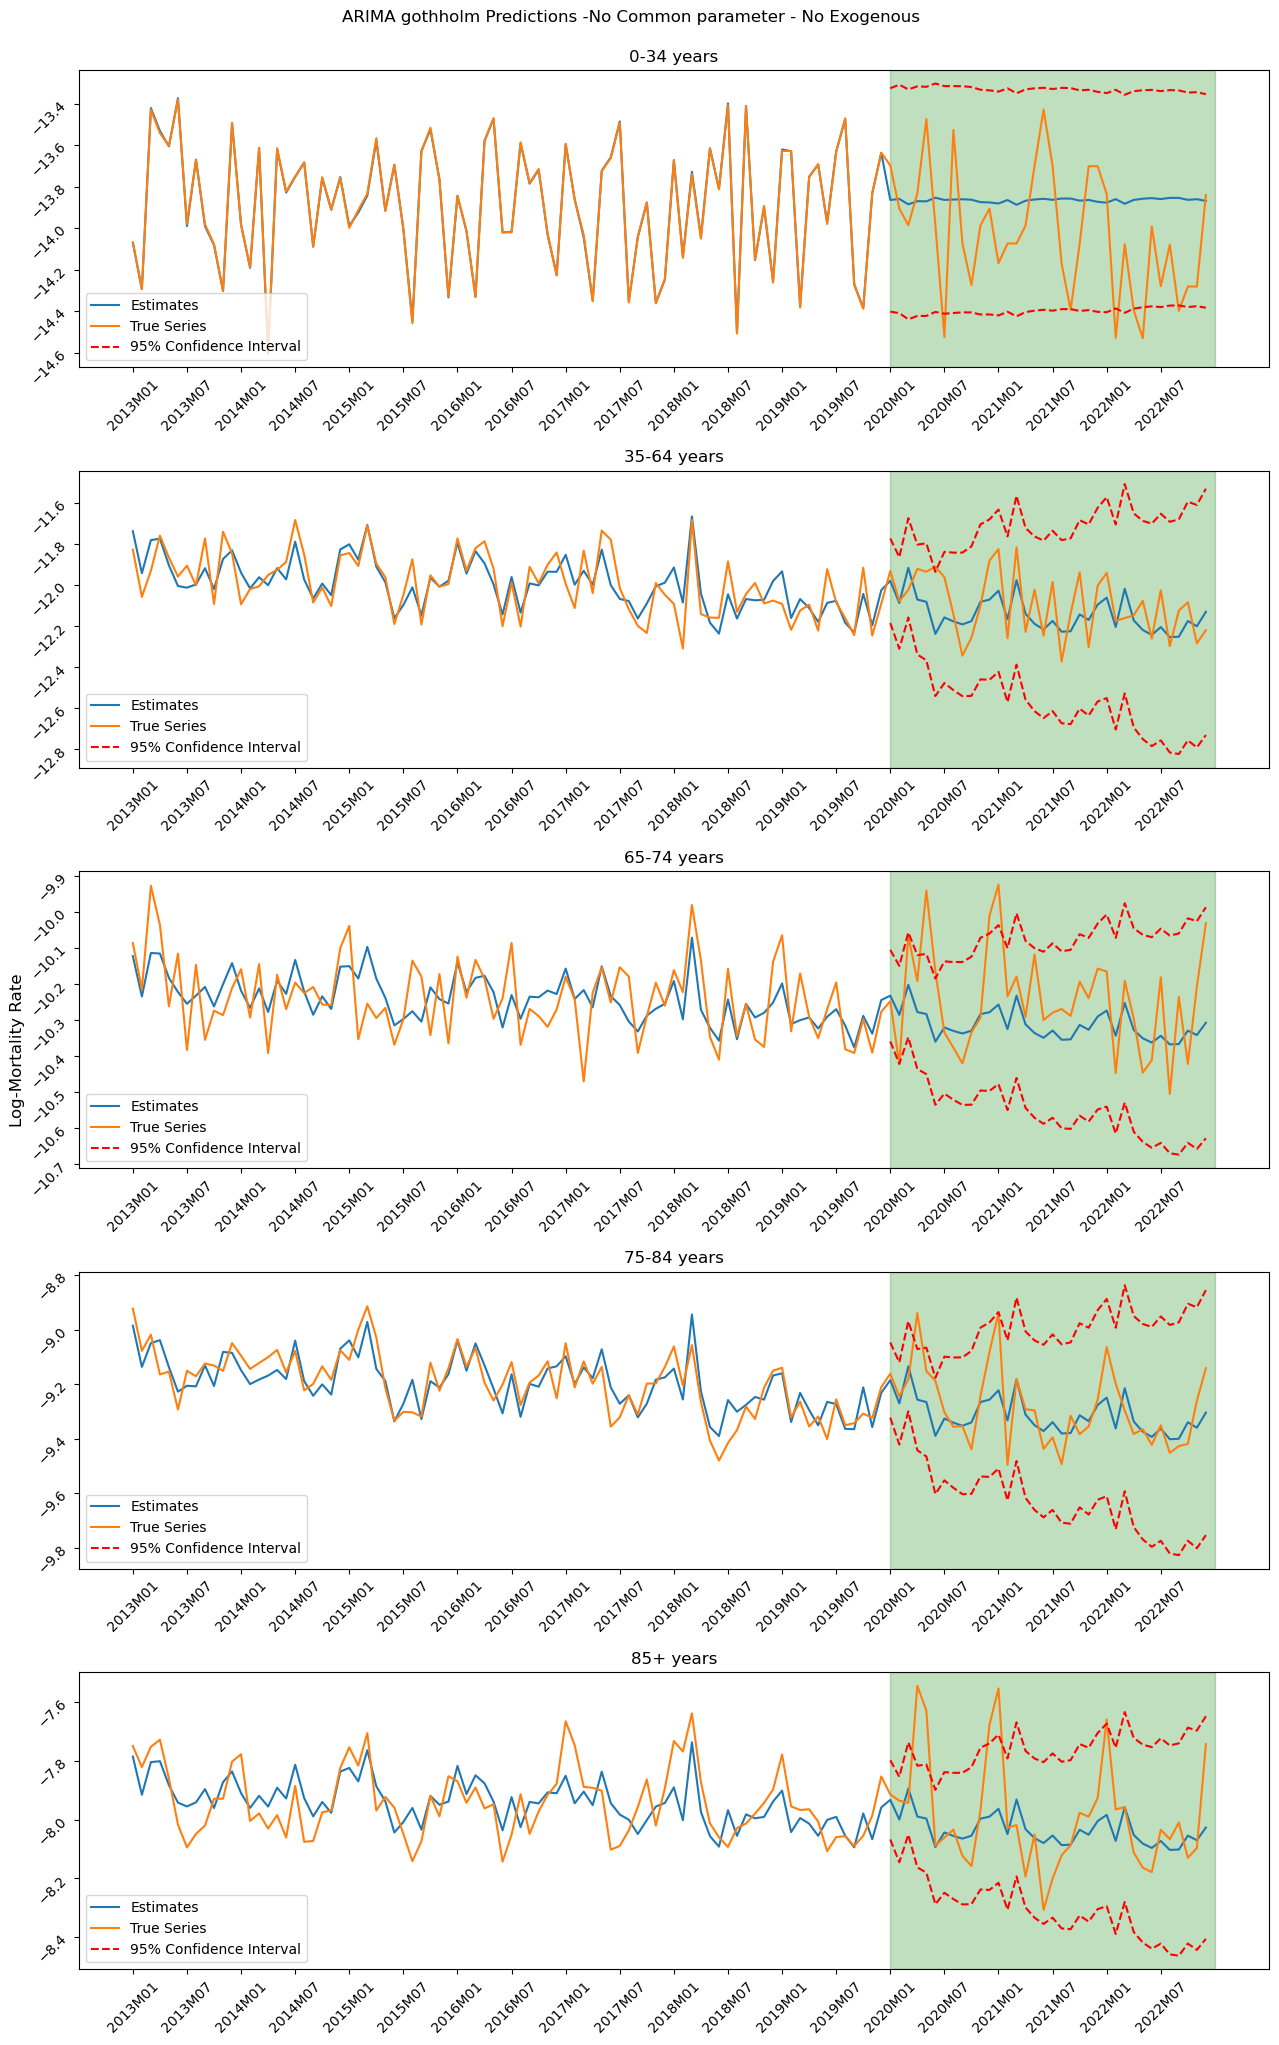

In [90]:
## Model No Common parameter - No Exogenous
a_xi,b_xs,k_ts,regional_re_est,k_t_models,k_t_preds,regional_predictions_nocommoutCOVID,regional_predictions_upconf,regional_predictions_lowconf,model_error,res,D = model_no_common(goth_logmort_incCOVID,regional_terms = 2,prediction_period = 36,train_period = 84,region_deaths = goth_death_COVID,region_pop = goth_pop_COVID,re_est = False,smooth = False)

#exogenous_train = exog_train_goth,exogenous_test = exog_test_goth
regional_predictions_nocommoutCOVID = pd.DataFrame(regional_predictions_nocommoutCOVID)
regional_predictions_upconf = pd.DataFrame(regional_predictions_upconf)
regional_predictions_lowconf = pd.DataFrame(regional_predictions_lowconf)

regional_predictions_nocommoutCOVID.index = goth_logmort_incCOVID.index
regional_predictions_nocommoutCOVID.columns = goth_logmort_incCOVID.columns
regional_predictions_upconf.index = goth_logmort_incCOVID.index
regional_predictions_upconf.columns = goth_logmort_incCOVID.columns
regional_predictions_lowconf.index = goth_logmort_incCOVID.index
regional_predictions_lowconf.columns = goth_logmort_incCOVID.columns

print("Model Error " + str(model_error))
print("Re_estimation error Each Age Group (MAPE): "+str(MAPE(regional_predictions_nocommoutCOVID.iloc[:,:84],goth_logmort_incCOVID.iloc[:,:84])))

#AIC_values = [K_t_models["model_0"].aic(),K_t_models["model_1"].aic(),k_t_models["model_0"].aic(),k_t_models["model_1"].aic()]
#print("\n Model AIC Values [K_t1,K_t2,k_t1,k_t2]: \n"+ str(AIC_values))

print("\n Prediction Error Each Age Group (MAPE)" +str(MAPE(regional_predictions_nocommoutCOVID.iloc[:,84:],goth_logmort_incCOVID.iloc[:,84:])))
#print(k_t_models["model_0"].summary())

#goth_pop_inCOVID = undo_person_days(pd.DataFrame(goth_pop_inCOVID,columns = goth_logmort_incCOVID.columns[-36:]))


exp_term = np.multiply(np.exp(a_xi+b_xs@np.diag(D)[:2,:2]@k_t_preds[:,84:]),goth_pop_inCOVID) ### Add scaling of singular values
exp_term = np.round(exp_term,0)
pred_total_deaths = np.sum(exp_term,axis = 1)
actual_total_deaths = np.sum(goth_death_inCOVID,axis = 1)

error_NoCom_woutCOVID = MAPE(regional_predictions_nocommoutCOVID.iloc[:,84:],goth_logmort_incCOVID.iloc[:,84:])
prediction_plots(regional_predictions_nocommoutCOVID,regional_predictions_upconf,regional_predictions_lowconf,36,goth_logmort_incCOVID,suptitle = "ARIMA gothholm Predictions -No Common parameter - No Exogenous ")



In [91]:
goth_NoCom_NoExog_deaths_20 = pd.DataFrame(exp_term).iloc[:,:6].sum(axis = 1) #only first half of 2020
goth_NoCom_NoExog_deaths_20_21 = epi_year(pd.DataFrame(exp_term))["year_0"].sum(axis = 1)
goth_NoCom_NoExog_deaths_21_22 = epi_year(pd.DataFrame(exp_term))["year_1"].sum(axis = 1)
goth_NoCom_NoExog_deaths_22 = epi_year(pd.DataFrame(exp_term))["year_2"].sum(axis = 1)

p_value k_t0 before re-estimation: 0.7278170672018842 

Regional k_t0 is white noise with LB p_value 0.7278170672018842 

p_value k_t1 before re-estimation: 2.0921643199900074e-29 

p_value k_t2 before re-estimation: 3.5147388886299156e-15 

Proportion of k_t values which are positive[0.47619048 0.51190476 0.52380952] 

Proportion of b_x values which are positive[0.2 0.2 0.4] 

p_value k_t0 after re-estimation: 0.9523432549049936 

Regional k_t0 is white noise with LB p_value 0.9523432549049936 

p_value k_t1 after re-estimation: 1.4799456185462643e-11 

p_value k_t2 after re-estimation: 3.327207812920768e-07 

Model Error 6.572050807586717
Re_estimation error Each Age Group (MAPE): [0.0300048  0.12405647 0.63919025 0.45489453 0.43188484]

 Prediction Error Each Age Group (MAPE)[2.14001423 1.05022167 1.09620457 0.92808001 1.35753032]


<Figure size 640x480 with 0 Axes>

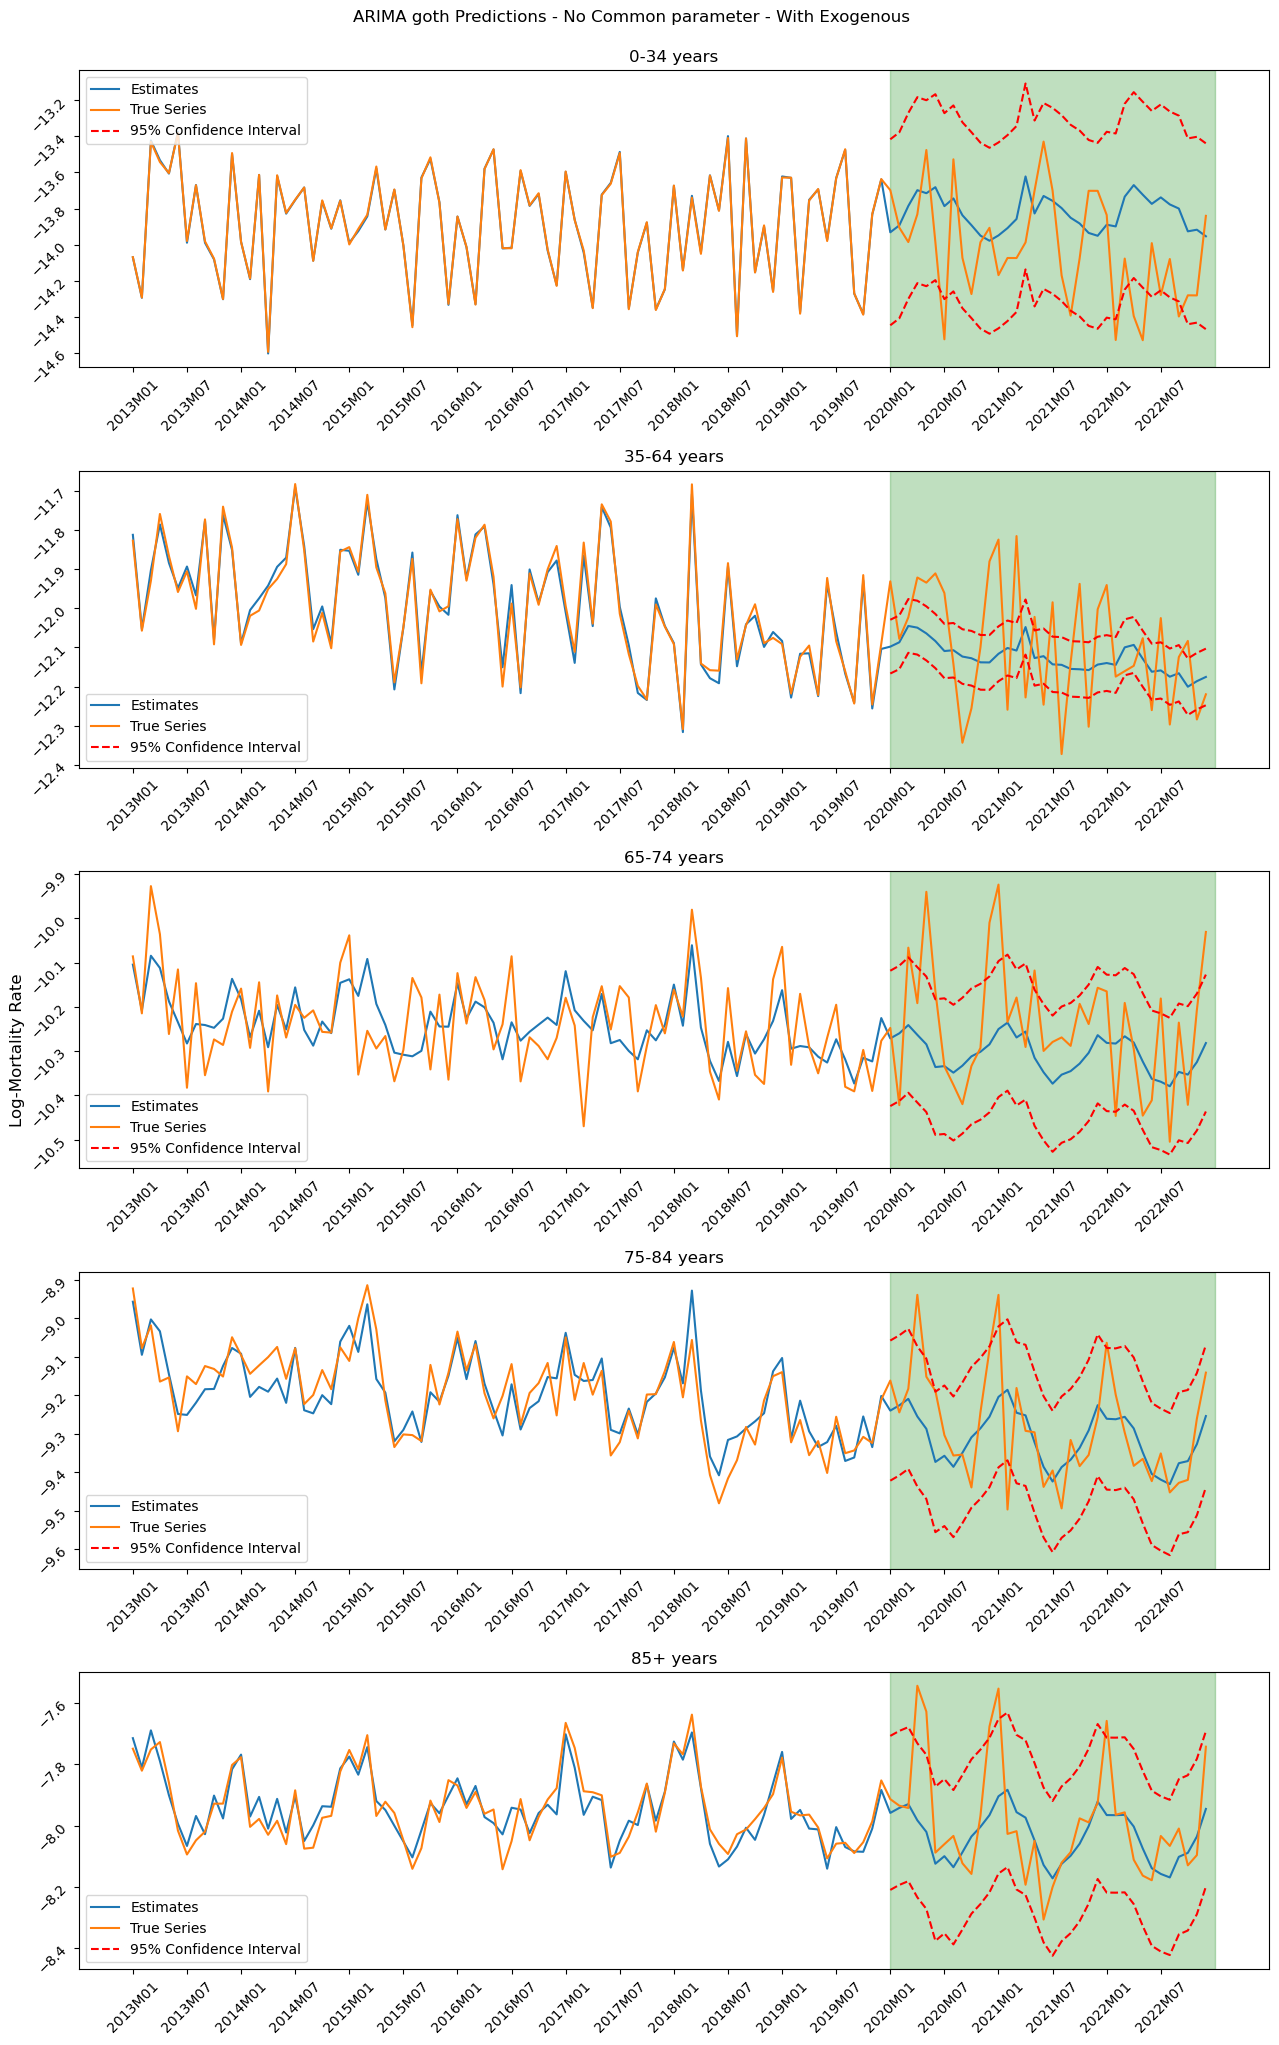

In [94]:
## Model No nocommon parameter - With Exogenous
## Model No nocommon parameter - With Exogenous
exog_train_goth_COVID_2 = exog_train_goth_COVID.iloc[:,:2]
exog_test_goth_COVID_2 = exog_test_goth_COVID.iloc[:,:2]
a_xi,b_xs,k_ts,regional_re_est,k_t_models,k_t_preds,regional_predictions_nocommwithCOVID,regional_predictions_upconf,regional_predictions_lowconf,model_error,res,D = model_no_common(goth_logmort_incCOVID,regional_terms = 3,prediction_period = 36,train_period = 84,exogenous_train = exog_train_goth_COVID_2,exogenous_test = exog_test_goth_COVID_2,region_deaths = goth_death_COVID,region_pop = goth_pop_COVID,re_est = False,smooth = False)

#exogenous_train = exog_train_goth,exogenous_test = exog_test_goth
regional_predictions_nocommwithCOVID = pd.DataFrame(regional_predictions_nocommwithCOVID)
regional_predictions_upconf = pd.DataFrame(regional_predictions_upconf)
regional_predictions_lowconf = pd.DataFrame(regional_predictions_lowconf)

regional_predictions_nocommwithCOVID.index = goth_logmort_incCOVID.index
regional_predictions_nocommwithCOVID.columns = goth_logmort_incCOVID.columns
regional_predictions_upconf.index = goth_logmort_incCOVID.index
regional_predictions_upconf.columns = goth_logmort_incCOVID.columns
regional_predictions_lowconf.index = goth_logmort_incCOVID.index
regional_predictions_lowconf.columns = goth_logmort_incCOVID.columns

print("Model Error " + str(model_error))
print("Re_estimation error Each Age Group (MAPE): "+str(MAPE(regional_predictions_nocommwithCOVID.iloc[:,:84],goth_logmort_incCOVID.iloc[:,:84])))

#AIC_values = [K_t_models["model_0"].aic(),K_t_models["model_1"].aic(),k_t_models["model_0"].aic(),k_t_models["model_1"].aic()]
#print("\n Model AIC Values [K_t1,K_t2,k_t1,k_t2]: \n"+ str(AIC_values))

print("\n Prediction Error Each Age Group (MAPE)" +str(MAPE(regional_predictions_nocommwithCOVID.iloc[:,84:],goth_logmort_incCOVID.iloc[:,84:])))
#print(k_t_models["model_0"].summary())

#goth_pop_inCOVID = undo_person_days(pd.DataFrame(goth_pop_inCOVID,columns = goth_logmort_incCOVID.columns[-36:]))


exp_term = np.multiply(np.exp(a_xi+ b_xs@np.diag(D)[:3,:3]@k_t_preds[:,84:]),goth_pop_inCOVID) ### Add scaling of singular values
exp_term = np.round(exp_term,0)
pred_total_deaths = np.sum(exp_term,axis = 1)
actual_total_deaths = np.sum(goth_death_inCOVID,axis = 1)



error_NoCom_withCOVID = MAPE(regional_predictions_nocommwithCOVID.iloc[:,84:],goth_logmort_incCOVID.iloc[:,84:])
prediction_plots(regional_predictions_nocommwithCOVID,regional_predictions_upconf,regional_predictions_lowconf,36,goth_logmort_incCOVID,suptitle = "ARIMA goth Predictions - No Common parameter - With Exogenous ")



In [95]:
goth_NoCom_WithExog_deaths_20 = pd.DataFrame(exp_term).iloc[:,:6].sum(axis = 1) #only first half of 2020
goth_NoCom_WithExog_deaths_20_21 = epi_year(pd.DataFrame(exp_term))["year_0"].sum(axis = 1)
goth_NoCom_WithExog_deaths_21_22 = epi_year(pd.DataFrame(exp_term))["year_1"].sum(axis = 1)
goth_NoCom_WithExog_deaths_22 = epi_year(pd.DataFrame(exp_term))["year_2"].sum(axis = 1)

p_value k_t0 before re-estimation: 1.6217342512813452e-07 

p_value k_t0 after re-estimation: 1.6217342512813452e-07 

Model Error 6.0767803103613485
Re_estimation error Each Age Group (MAPE): [1.59570362 0.90065058 0.83092732 0.60233812 0.74063741]

 Prediction Error Each Age Group (MAPE)[1.68870902 1.03721154 1.16359742 1.0587422  1.44665409]

Predicted number of deaths for COVID period [ 439. 2508. 3639. 6908. 9772.]
Actual number of deaths for COVID period [  435  2545  3841  7162 10110]
Actual deaths over predicted deaths [0.99088838 1.01475279 1.05550976 1.03676896 1.03458862]
Total Excess Mortality (Actual - Predicted): -827.0
Excess Mortality Ratio (Actual/Predicted): 0.9656746772921595


<Figure size 640x480 with 0 Axes>

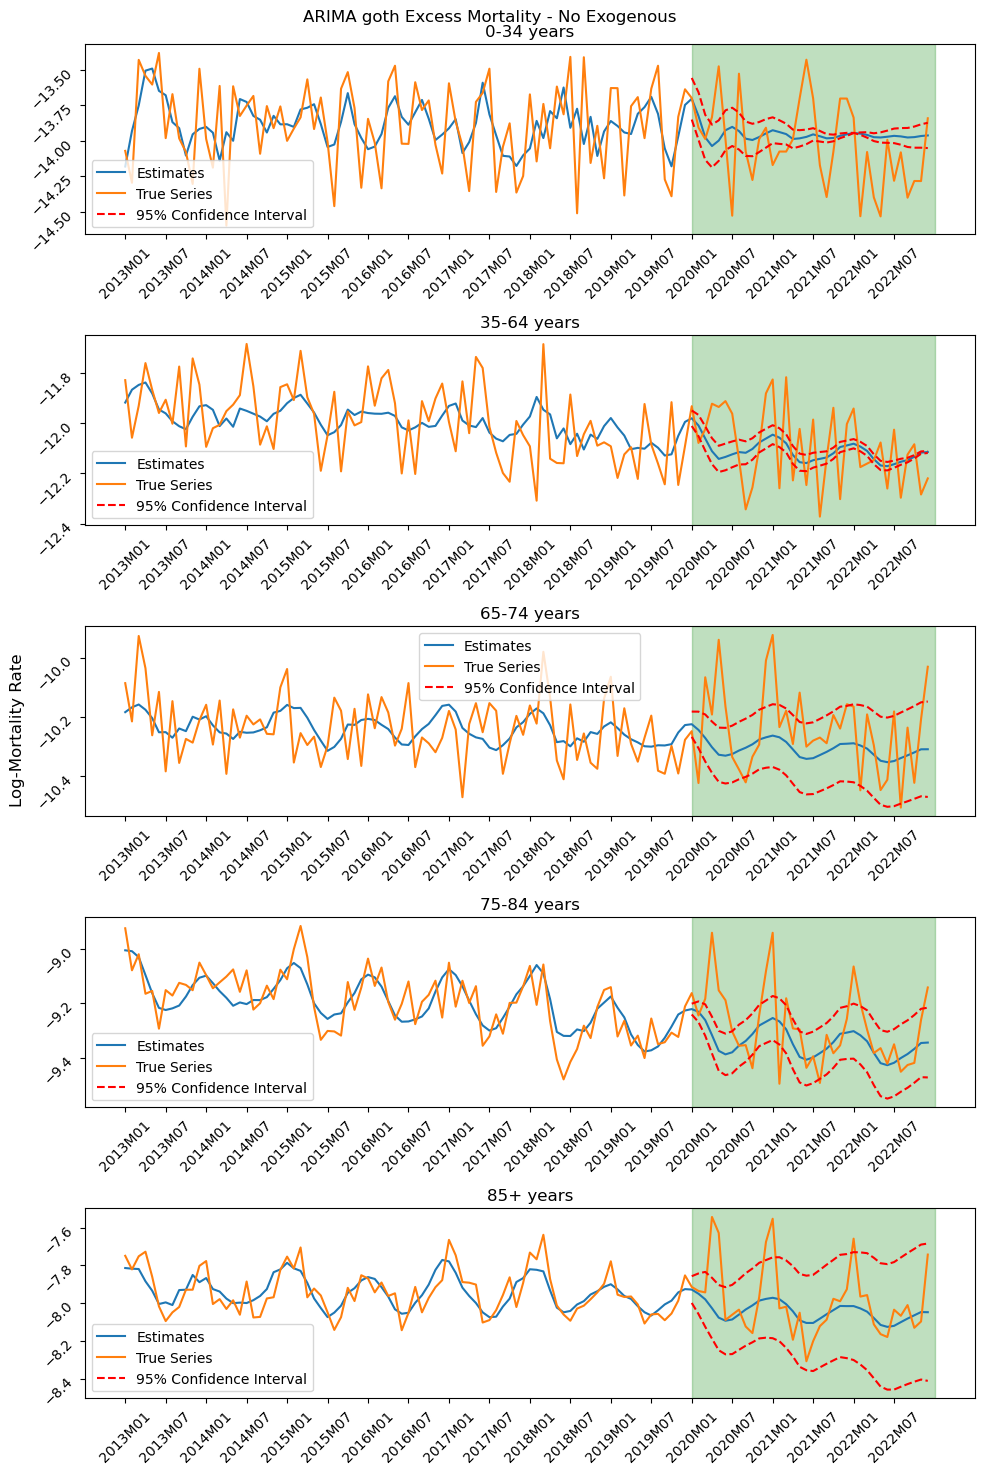

In [77]:
### Without Exogenous
a_xi,B_xs,K_ts,b_xs,k_ts,country_re_est,regional_re_est,K_t_models,k_t_models_sarout,K_t_preds,k_t_preds,regional_predictions_saroutCOVID,regional_predictions_upconf,regional_predictions_lowconf,model_error,res,_,_ = full_model(all_swe_logmort_incCOVID,goth_logmort_incCOVID, common_terms = 2,regional_terms = 1,prediction_period = 36,train_period = 84,country_deaths = swe_death_COVID, country_pop = swe_pop_COVID,region_deaths = goth_death_COVID,region_pop = goth_pop_COVID,re_est = False,smooth = True)  


regional_predictions_saroutCOVID = pd.DataFrame(regional_predictions_saroutCOVID)
regional_predictions_upconf = pd.DataFrame(regional_predictions_upconf)
regional_predictions_lowconf = pd.DataFrame(regional_predictions_lowconf)

regional_predictions_saroutCOVID.index = goth_logmort_incCOVID.index
regional_predictions_saroutCOVID.columns = goth_logmort_incCOVID.columns
regional_predictions_upconf.index = goth_logmort_incCOVID.index
regional_predictions_upconf.columns = goth_logmort_incCOVID.columns
regional_predictions_lowconf.index = goth_logmort_incCOVID.index
regional_predictions_lowconf.columns = goth_logmort_incCOVID.columns

print("Model Error " + str(model_error))
print("Re_estimation error Each Age Group (MAPE): "+str(MAPE(regional_predictions_saroutCOVID.iloc[:,:84],goth_logmort_incCOVID.iloc[:,:84])))

#AIC_values = [K_t_models["model_0"].aic(),K_t_models["model_1"].aic(),k_t_models["model_0"].aic(),k_t_models["model_1"].aic()]
#print("\n Model AIC Values [K_t1,K_t2,k_t1,k_t2]: \n"+ str(AIC_values))

print("\n Prediction Error Each Age Group (MAPE)" +str(MAPE(regional_predictions_saroutCOVID.iloc[:,84:],goth_logmort_incCOVID.iloc[:,84:])))

#goth_pop_inCOVID = undo_person_days(pd.DataFrame(goth_pop_inCOVID,columns = goth_logmort_incCOVID.columns[-36:]))


exp_term = np.multiply(np.exp(a_xi+B_xs@K_t_preds[:,84:] + b_xs@k_t_preds[:,84:]),goth_pop_inCOVID)
exp_term = np.round(exp_term,0)
pred_total_deaths = np.sum(exp_term,axis = 1)
actual_total_deaths = np.sum(goth_death_inCOVID,axis = 1)
print("\nPredicted number of deaths for COVID period " + str(pred_total_deaths))
print("Actual number of deaths for COVID period " + str(actual_total_deaths))
print("Actual deaths over predicted deaths " +str(actual_total_deaths/pred_total_deaths))
print("Total Excess Mortality (Actual - Predicted): " + str(np.sum(pred_total_deaths) - np.sum(actual_total_deaths)))
print("Excess Mortality Ratio (Actual/Predicted): " + str(np.sum(pred_total_deaths)/np.sum(actual_total_deaths)))


regional_predictions_saroutCOVID
error_SARIMAX_woutCOVID = MAPE(regional_predictions_saroutCOVID.iloc[:,84:],goth_logmort_incCOVID.iloc[:,84:])
prediction_plots(regional_predictions_saroutCOVID,regional_predictions_upconf,regional_predictions_lowconf,36,goth_logmort_incCOVID,suptitle = "ARIMA goth Excess Mortality - No Exogenous")


In [29]:
print(str(K_t_models["model_0"].get_params()["order"]) + str(K_t_models["model_0"].get_params()["seasonal_order"]))
print(str(K_t_models["model_1"].get_params()["order"]) + str(K_t_models["model_1"].get_params()["seasonal_order"]))
print("-")
print(str(k_t_models_sarout["model_0"].get_params()["order"]) + str(k_t_models_sarout["model_0"].get_params()["seasonal_order"]))


(1, 1, 0)(2, 0, 1, 12)
(3, 1, 0)(2, 0, 0, 12)
-
(4, 0, 0)(0, 0, 0, 12)


p_value k_t0 before re-estimation: 8.958869399806466e-07 

p_value k_t0 after re-estimation: 8.958869399806466e-07 

Model Error 5.9201280124406646
Re_estimation error Each Age Group (MAPE): [1.59697927 0.84646573 0.82012409 0.57807248 0.67426336]

 Prediction Error Each Age Group (MAPE)[1.88436833 1.04119541 1.11670037 1.10035207 1.42181673]

Predicted number of deaths for COVID period [  475.  2376.  3759.  6709. 10293.]
Actual number of deaths for COVID period [  435  2545  3841  7162 10110]
Actual deaths over predicted deaths [0.91578947 1.07112795 1.02181431 1.06752124 0.98222093]
Total Excess Mortality (Actual - Predicted): -481.0
Excess Mortality Ratio (Actual/Predicted): 0.9800356950151496


<Figure size 640x480 with 0 Axes>

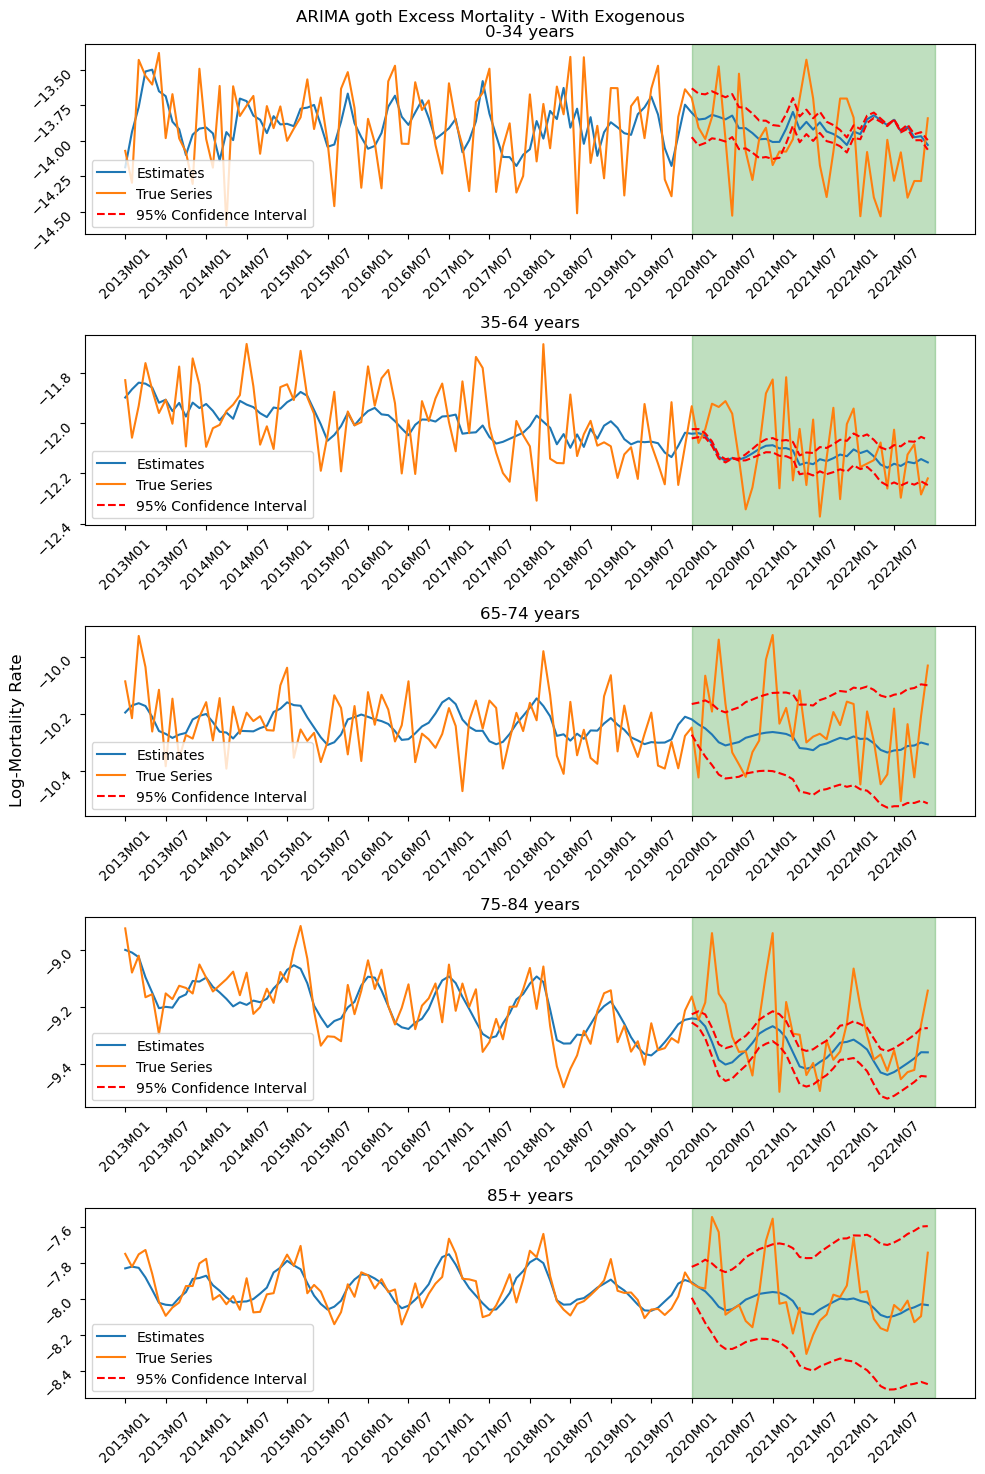

In [78]:
### With Exogenous
a_xi,B_xs,K_ts,b_xs,k_ts,country_re_est,regional_re_est,K_t_models,k_t_models_sarw,K_t_preds,k_t_preds,regional_predictions_sarwithCOVID,regional_predictions_upconf,regional_predictions_lowconf,model_error,res,_,_ = full_model(all_swe_logmort_incCOVID,goth_logmort_incCOVID, common_terms = 3,regional_terms = 1,prediction_period = 36,train_period = 84,exogenous_train = exog_train_goth_COVID,exogenous_test = exog_test_goth_COVID,country_deaths = swe_death_COVID, country_pop = swe_pop_COVID,region_deaths = goth_death_COVID,region_pop = goth_pop_COVID,re_est = False,smooth = True)  


regional_predictions_sarwithCOVID = pd.DataFrame(regional_predictions_sarwithCOVID)
regional_predictions_upconf = pd.DataFrame(regional_predictions_upconf)
regional_predictions_lowconf = pd.DataFrame(regional_predictions_lowconf)

regional_predictions_sarwithCOVID.index = goth_logmort_incCOVID.index
regional_predictions_sarwithCOVID.columns = goth_logmort_incCOVID.columns
regional_predictions_upconf.index = goth_logmort_incCOVID.index
regional_predictions_upconf.columns = goth_logmort_incCOVID.columns
regional_predictions_lowconf.index = goth_logmort_incCOVID.index
regional_predictions_lowconf.columns = goth_logmort_incCOVID.columns

print("Model Error " + str(model_error))
print("Re_estimation error Each Age Group (MAPE): "+str(MAPE(regional_predictions_sarwithCOVID.iloc[:,:84],goth_logmort_incCOVID.iloc[:,:84])))

#AIC_values = [K_t_models["model_0"].aic(),K_t_models["model_1"].aic(),k_t_models["model_0"].aic(),k_t_models["model_1"].aic()]
#print("\n Model AIC Values [K_t1,K_t2,k_t1,k_t2]: \n"+ str(AIC_values))

print("\n Prediction Error Each Age Group (MAPE)" +str(MAPE(regional_predictions_sarwithCOVID.iloc[:,84:],goth_logmort_incCOVID.iloc[:,84:])))

#goth_pop_inCOVID = undo_person_days(pd.DataFrame(goth_pop_inCOVID,columns = goth_logmort_incCOVID.columns[-36:]))


exp_term = np.multiply(np.exp(a_xi+B_xs@K_t_preds[:,84:] + b_xs@k_t_preds[:,84:]),goth_pop_inCOVID)
exp_term = np.round(exp_term,0)
pred_total_deaths = np.sum(exp_term,axis = 1)
actual_total_deaths = np.sum(goth_death_inCOVID,axis = 1)
print("\nPredicted number of deaths for COVID period " + str(pred_total_deaths))
print("Actual number of deaths for COVID period " + str(actual_total_deaths))
print("Actual deaths over predicted deaths " +str(actual_total_deaths/pred_total_deaths))
print("Total Excess Mortality (Actual - Predicted): " + str(np.sum(pred_total_deaths) - np.sum(actual_total_deaths)))
print("Excess Mortality Ratio (Actual/Predicted): " + str(np.sum(pred_total_deaths)/np.sum(actual_total_deaths)))


error_SARIMAX_withCOVID = MAPE(regional_predictions_sarwithCOVID.iloc[:,84:],goth_logmort_incCOVID.iloc[:,84:])
prediction_plots(regional_predictions_sarwithCOVID,regional_predictions_upconf,regional_predictions_lowconf,36,goth_logmort_incCOVID,suptitle = "ARIMA goth Excess Mortality - With Exogenous")



In [41]:
print(str(K_t_models["model_0"].get_params()["order"]) + str(K_t_models["model_0"].get_params()["seasonal_order"]))
print(str(K_t_models["model_1"].get_params()["order"]) + str(K_t_models["model_1"].get_params()["seasonal_order"]))
print("-")
print(str(k_t_models_sarw["model_0"].get_params()["order"]) + str(k_t_models_sarw["model_0"].get_params()["seasonal_order"]))


(1, 1, 1)(2, 0, 1, 12)
(2, 1, 0)(1, 0, 2, 12)
-
(0, 0, 0)(0, 0, 0, 12)


test_errors[2.12596058 1.15951947 1.29718322 1.7892469  1.75992786]

Predicted number of deaths for COVID period [ 505. 2451. 3597. 6544. 9788.]
Actual number of deaths for COVID period [  435  2545  3841  7162 10110]
Actual deaths over predicted deaths [0.86138614 1.03835169 1.06783431 1.09443765 1.03289743]
Total Excess Mortality (Actual - Predicted): -1208.0
Excess Mortality Ratio (Actual/Predicted): 0.9498609554642428


<Figure size 640x480 with 0 Axes>

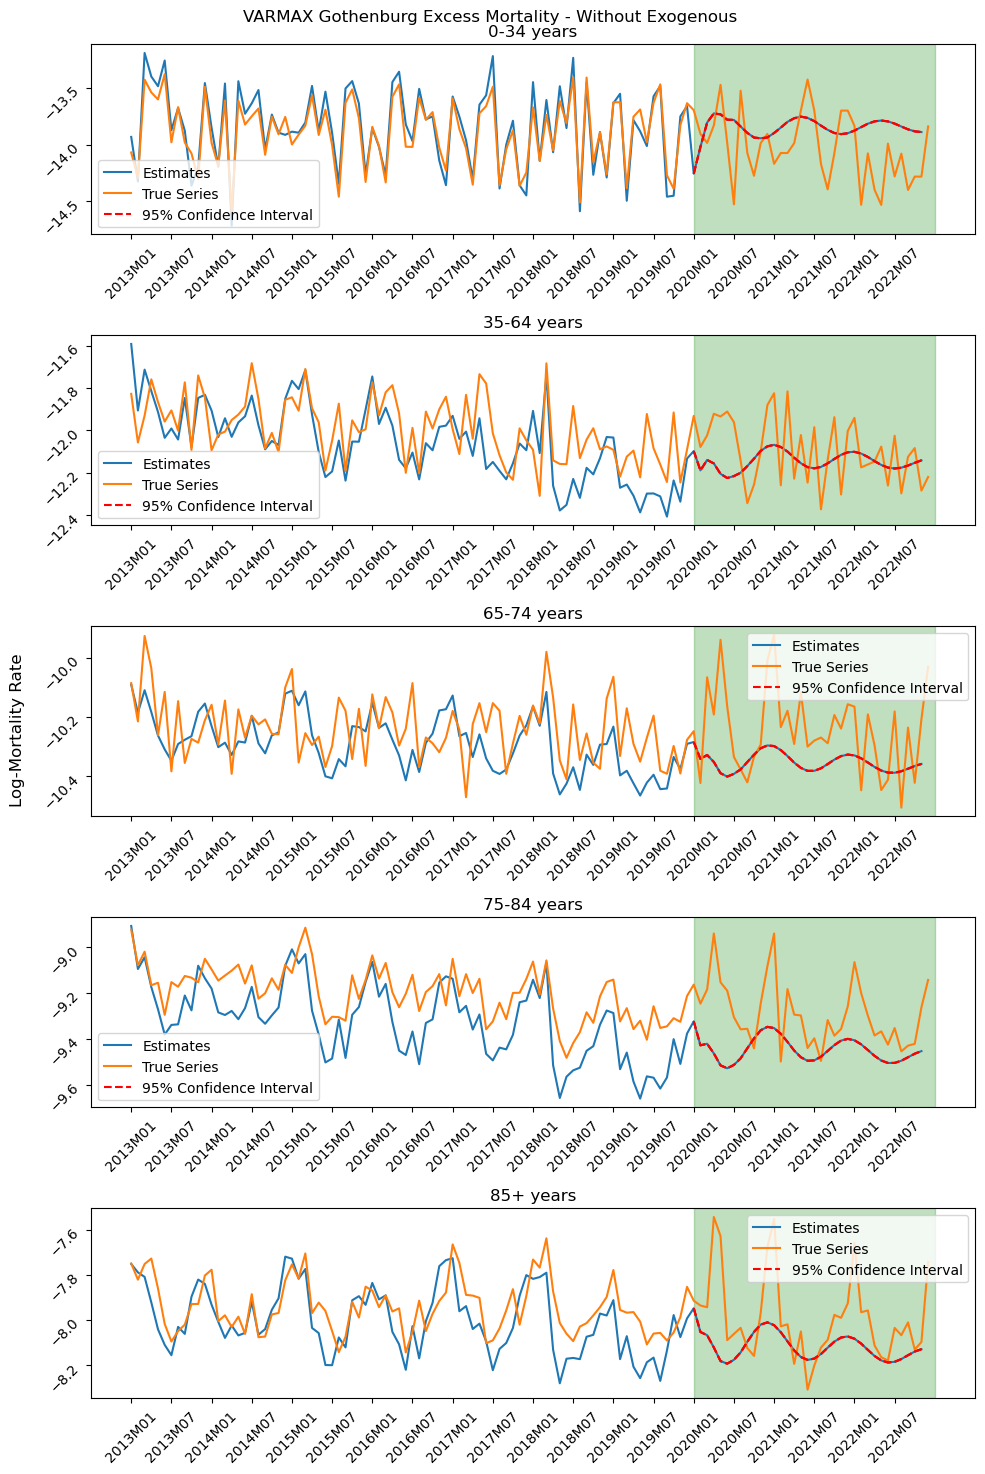

In [79]:
all_k_t, K_ts,k_ts,B_xs,b_xs,a_xi,all_k_preds,predictions_VAR_woutCOVID,predictions_lowconf,predictions_upconf,model_VAR_woutCOVID,aic,error_VAR_woutCOVID,_,_ = VARMAX_model(all_swe_logmort_incCOVID,goth_logmort_incCOVID, common_terms = 3,regional_terms = 2,prediction_period = 36,train_period = 84,AR= 3,MA = 2, country_deaths = swe_death_COVID,country_pop = swe_pop_COVID,region_deaths = goth_death_COVID,region_pop = goth_pop_COVID,re_est = False)


print("test_errors" + str(error_VAR_woutCOVID))

K_t_preds = np.array(all_k_preds.iloc[84:,:3].fillna(method="ffill")).transpose() # change column number to match number of common terms
k_t_preds = np.array(all_k_preds.iloc[84:,3:]).transpose()

#goth_pop_inCOVID = undo_person_days(pd.DataFrame(goth_pop_inCOVID,columns = goth_logmort_incCOVID.columns[-36:]))


exp_term = np.multiply(np.exp(a_xi+B_xs@K_t_preds + b_xs@k_t_preds),goth_pop_inCOVID)
exp_term = np.round(exp_term,0)
pred_total_deaths = np.sum(exp_term,axis = 1)
actual_total_deaths = np.sum(goth_death_inCOVID,axis = 1)
print("\nPredicted number of deaths for COVID period " + str(pred_total_deaths))
print("Actual number of deaths for COVID period " + str(actual_total_deaths))
print("Actual deaths over predicted deaths " +str(actual_total_deaths/pred_total_deaths))
print("Total Excess Mortality (Actual - Predicted): " + str(np.sum(pred_total_deaths) - np.sum(actual_total_deaths)))
print("Excess Mortality Ratio (Actual/Predicted): " + str(np.sum(pred_total_deaths)/np.sum(actual_total_deaths)))


prediction_plots(predictions_VAR_woutCOVID,predictions_VAR_woutCOVID,predictions_VAR_woutCOVID,36,goth_logmort_incCOVID,suptitle = "VARMAX Gothenburg Excess Mortality - Without Exogenous")



In [ ]:
all_k_preds

test_errors[2.28472213 2.24153939 2.93839313 5.32616517 6.01886998]

Predicted number of deaths for COVID period [ 482. 2203. 3100. 5194. 7303.]
Actual number of deaths for COVID period [  435  2545  3841  7162 10110]
Actual deaths over predicted deaths [0.90248963 1.15524285 1.23903226 1.37889873 1.38436259]


<Figure size 640x480 with 0 Axes>

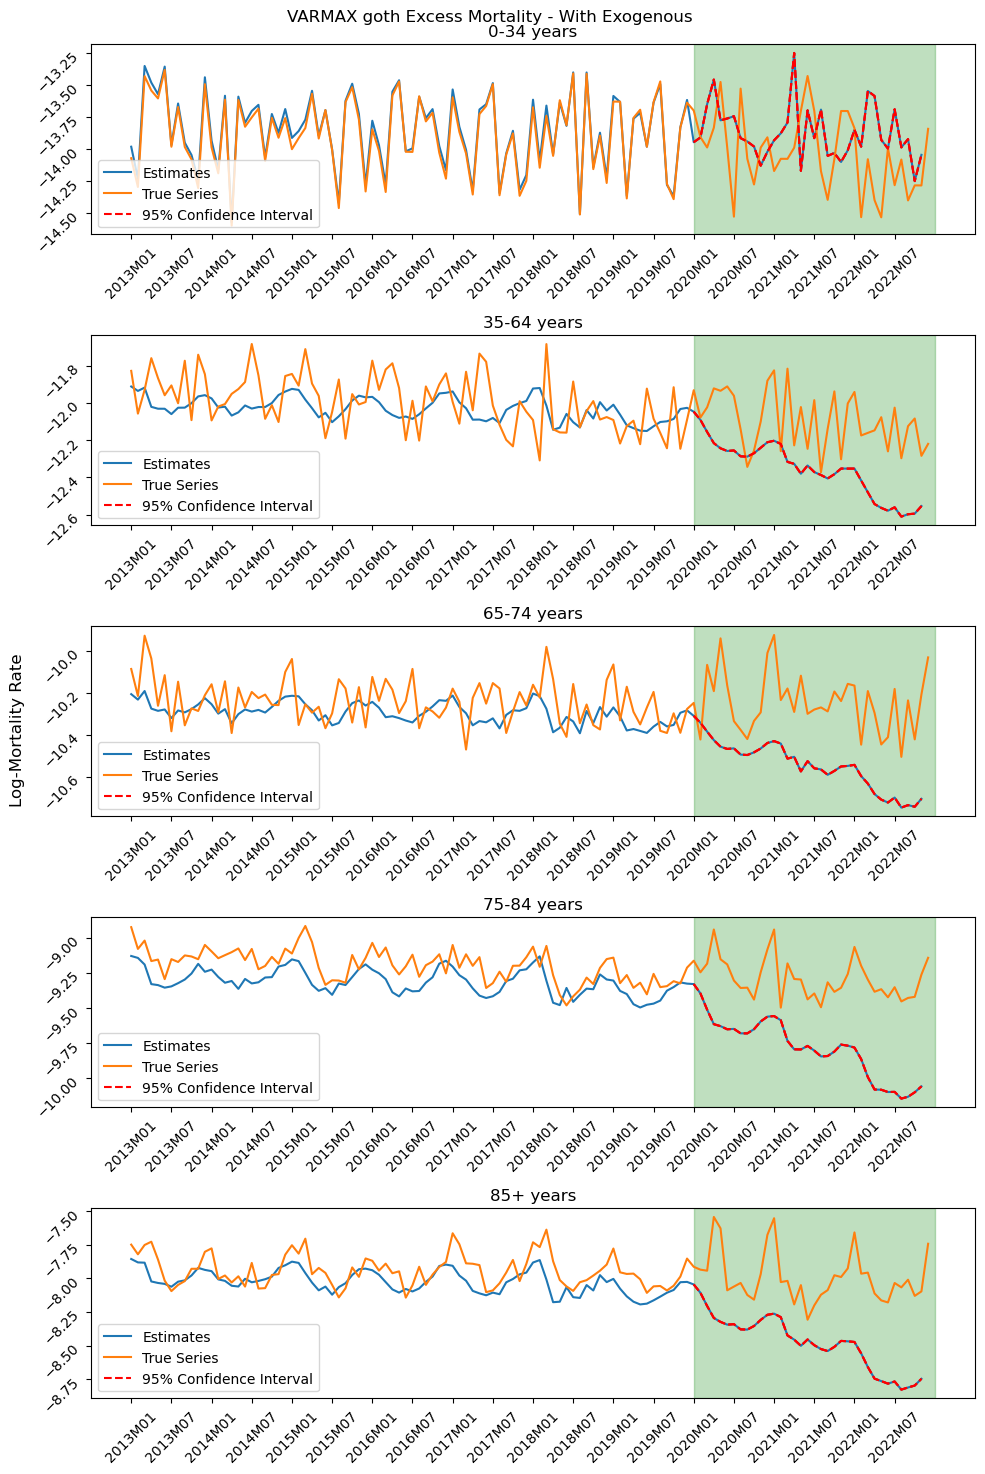

In [80]:
#exog_train_goth_COVID = lag_exogenous(exog_train_goth_COVID,numlags = 4)
#exog_test_goth_COVID = lag_exogenous(exog_test_goth_COVID,numlags = 4)
all_k_t, K_ts,k_ts,B_xs,b_xs,a_xi,all_k_preds,predictions_VAR_withCOVID,predictions_lowconf,predictions_upconf,model_VAR_withCOVID,aic,error_VAR_withCOVID,_,_ = VARMAX_model(all_swe_logmort_incCOVID,goth_logmort_incCOVID, common_terms = 1,regional_terms = 1,prediction_period = 36,train_period = 84,AR= 3,MA = 4,exogenous_train = exog_train_goth_COVID,exogenous_test = exog_test_goth_COVID,country_deaths = swe_death_COVID, country_pop = swe_pop_COVID,region_deaths = goth_death_COVID,region_pop = goth_pop_COVID,re_est = False,smooth = False)


print("test_errors" + str(error_VAR_withCOVID))

K_t_preds = np.array(all_k_preds.iloc[84:,:1].fillna(method="ffill")).transpose()
k_t_preds = np.array(all_k_preds.iloc[84:,1:].fillna(method = "ffill")).transpose()

#goth_pop_inCOVID = undo_person_days(pd.DataFrame(goth_pop_inCOVID,columns = goth_logmort_incCOVID.columns[-36:]))

exp_term = np.multiply(np.exp(a_xi+B_xs@K_t_preds + b_xs@k_t_preds),goth_pop_inCOVID)
exp_term = np.round(exp_term,0)
pred_total_deaths = np.sum(exp_term,axis = 1)
actual_total_deaths = np.sum(goth_death_inCOVID,axis = 1)
print("\nPredicted number of deaths for COVID period " + str(pred_total_deaths))
print("Actual number of deaths for COVID period " + str(actual_total_deaths))
print("Actual deaths over predicted deaths " +str(actual_total_deaths/pred_total_deaths))

prediction_plots(predictions_VAR_withCOVID,predictions_VAR_withCOVID,predictions_VAR_withCOVID,36,goth_logmort_incCOVID,suptitle = "VARMAX goth Excess Mortality - With Exogenous")


In [ ]:
model_VAR_withCOVID.bic

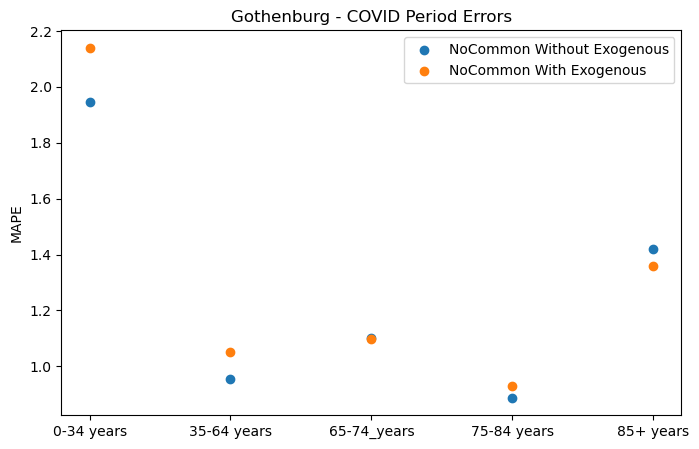

In [96]:
test_errors = np.vstack((error_SARIMAX_woutCOVID,error_SARIMAX_withCOVID,error_VAR_woutCOVID,error_VAR_withCOVID,error_NoCom_woutCOVID,error_NoCom_withCOVID))
malmoholm = test_errors

age_groups = ["0-34 years","35-64 years","65-74_years","75-84 years","85+ years"]
plt.figure(figsize = (8,5))
# plt.scatter(age_groups,malmoholm[0,:],label = "SARIMAX Without Exogenous")
# plt.scatter(age_groups,malmoholm[1,:],label = "SARIMAX With Exogenous")
# plt.scatter(age_groups,malmoholm[2,:],label = "VARMAX Without Exogenous")
# plt.scatter(age_groups,malmoholm[3,:],label = "VARMAX With Exogenous")
plt.scatter(age_groups,malmoholm[4,:],label = "NoCommon Without Exogenous")
plt.scatter(age_groups,malmoholm[5,:],label = "NoCommon With Exogenous")
plt.legend();
plt.ylabel("MAPE")
plt.title("Gothenburg - COVID Period Errors");

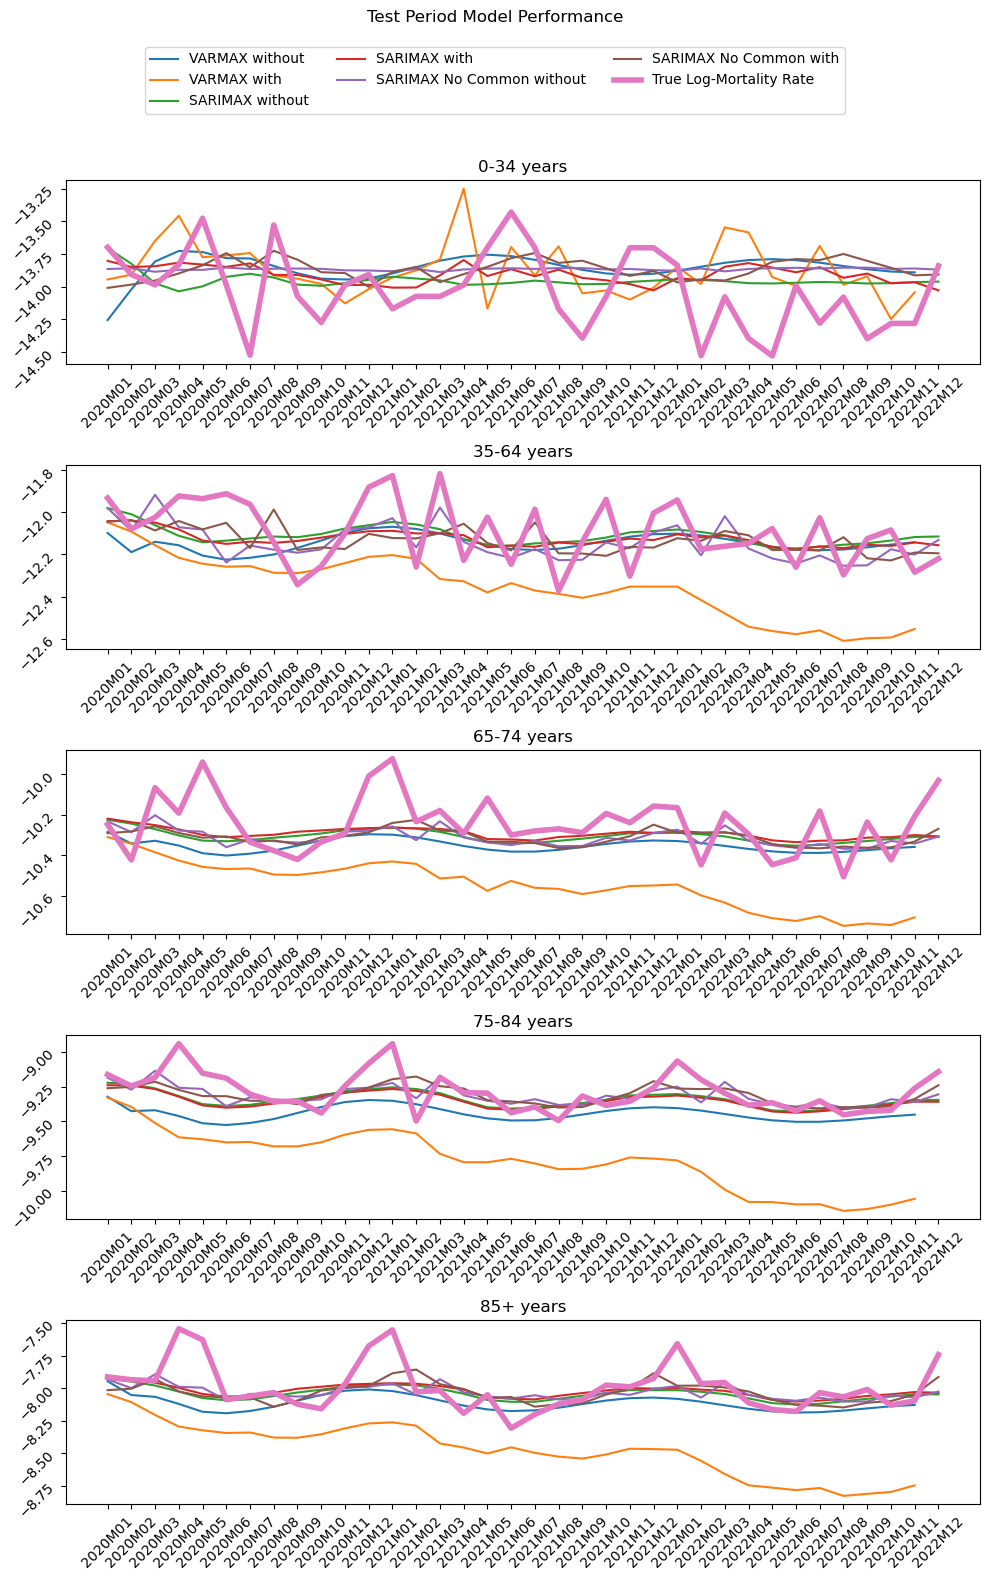

In [82]:
predictions_VAR_withCOVID = pd.DataFrame(predictions_VAR_withCOVID)
predictions_VAR_withCOVID.index = goth_logmort_incCOVID.index
predictions_VAR_withCOVID.columns = goth_logmort_incCOVID.columns

predictions_VAR_woutCOVID = pd.DataFrame(predictions_VAR_woutCOVID)
predictions_VAR_woutCOVID.index = goth_logmort_incCOVID.index
predictions_VAR_woutCOVID.columns = goth_logmort_incCOVID.columns


age_groups = ["0-34 years", "35-64 years", "65-74 years", "75-84 years", "85+ years"]
fig, axes = plt.subplots(nrows=5, ncols=1, figsize=(10, 15))

# Store lines and labels to create a single legend
lines = []
labels = []

for row in range(5):
    age = age_groups[row]
    axes[row].set_title(age)
    
    line1, = axes[row].plot(predictions_VAR_woutCOVID.iloc[row, 84:], label="VARMAX without")
    line2, = axes[row].plot(predictions_VAR_withCOVID.iloc[row, 84:], label="VARMAX with")
    line3, = axes[row].plot(regional_predictions_saroutCOVID.iloc[row, 84:], label="SARIMAX without")
    line4, = axes[row].plot(regional_predictions_sarwithCOVID.iloc[row, 84:], label="SARIMAX with")
    line5, = axes[row].plot(regional_predictions_nocommoutCOVID.iloc[row, 84:], label="SARIMAX No Common without")
    line6, = axes[row].plot(regional_predictions_nocommwithCOVID.iloc[row, 84:], label="SARIMAX No Common with")
    line7, = axes[row].plot(goth_logmort_incCOVID.iloc[row, 84:], label="True Log-Mortality Rate", linewidth=4)
    
    axes[row].tick_params(rotation=45)
    
    # Collect lines and labels for the legend
    if row == 0:
        lines.extend([line1, line2, line3, line4, line5, line6, line7])
        labels.extend([line.get_label() for line in lines])

# Create a single legend
fig.legend(lines, labels, loc='upper center', bbox_to_anchor=(0.5, 1.03), ncol=3)
plt.suptitle("Test Period Model Performance", y=1.05)
plt.tight_layout(rect=[0, 0, 1, 0.98])
plt.show()

Note: year 7 is only half an epiyear!  + First 6 months disregarded
Note: year 8 is only half an epiyear!  + First 6 months disregarded


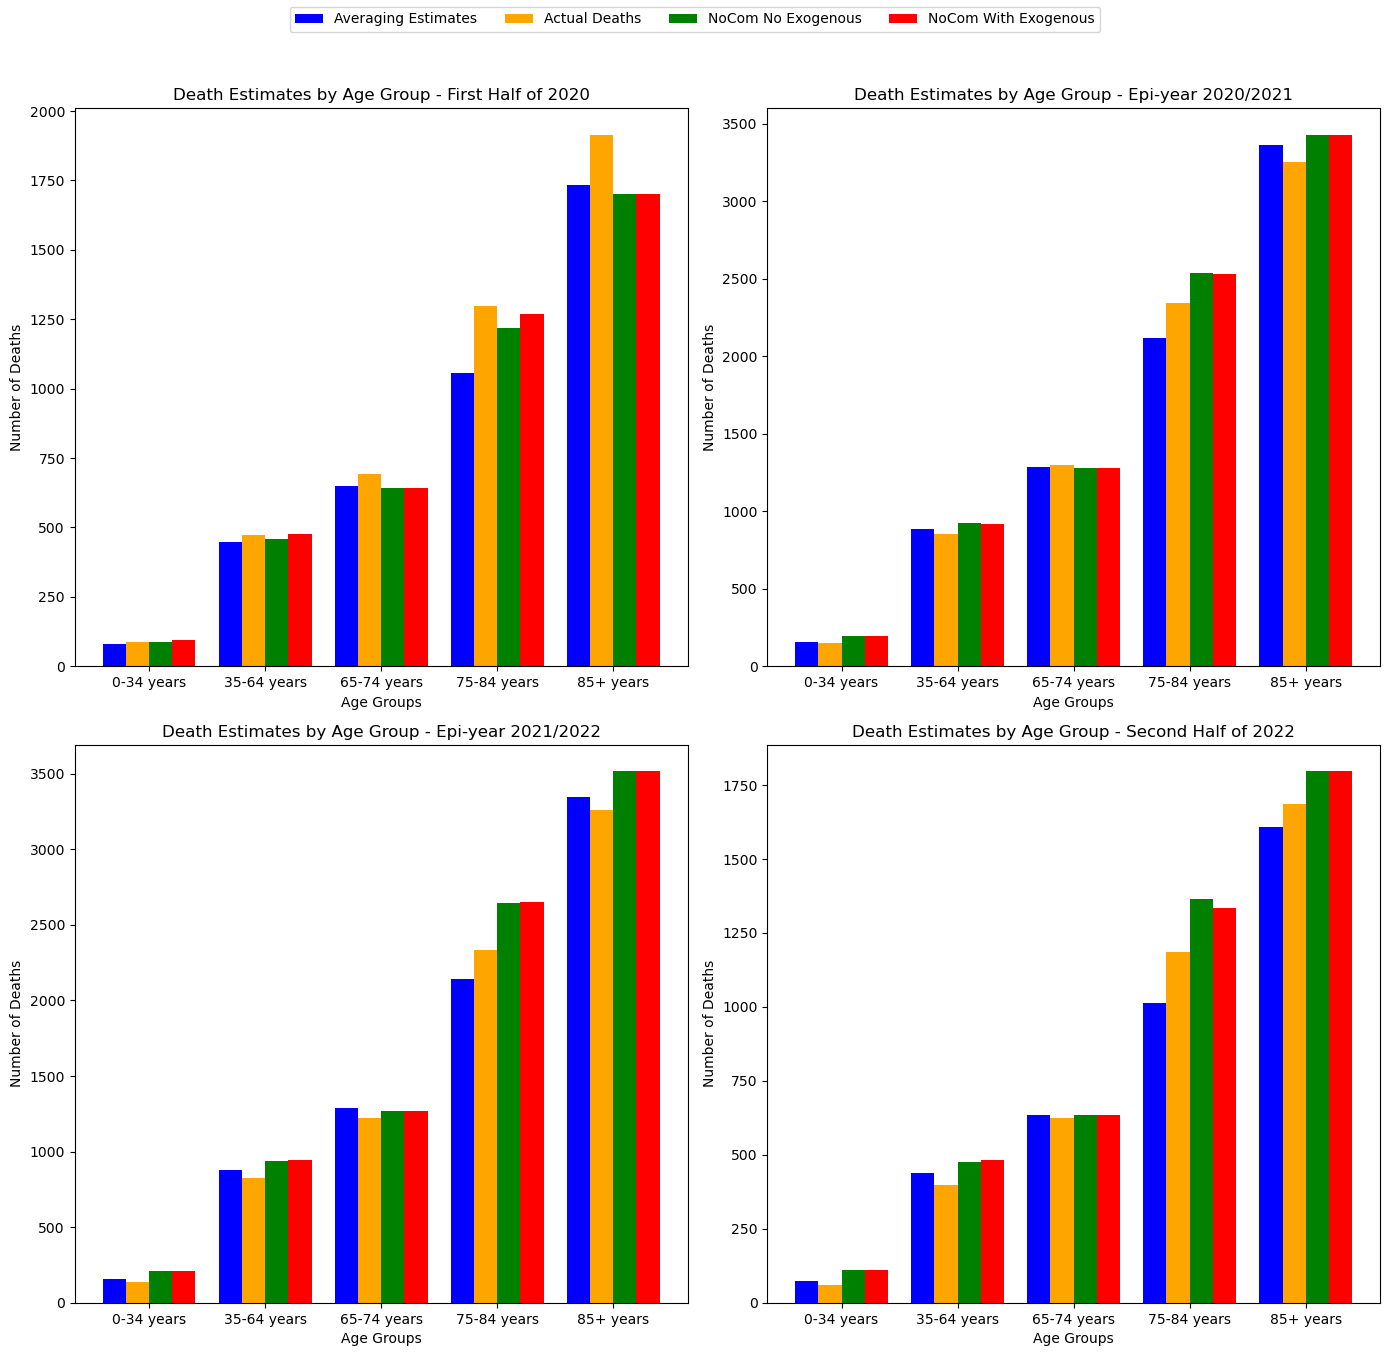

In [83]:
### Compile predictions for excess mortality for epidemic years
lin_ests_20 = np.round(est_half2_epiyear(goth_death_COVID),0) #estimate for first 6 moths of 2020 ie. second half epi-year 19/20

#Use 2019/20 epi-year in estimate for epi-year 2020/21?  
lin_ests_20_21 = np.reshape(epi_year_lin_ests(pd.DataFrame(goth_death_full.iloc[:,:96])),(5,))
lin_ests_21_22 = np.reshape(epi_year_lin_ests(pd.DataFrame(goth_death_full.iloc[:,:108])),(5,))

#estimate for last 6 months of 2022 ie. first half epi-year 19/20
lin_ests_22 = np.round(est_half1_epiyear(goth_death_COVID),0) #estimate for first 6 moths of 2020 ie. second half epi-year 19/20

# only first half of 2020, second half of epi-year 19/20
goth_actual_deaths_20 = goth_death_full.iloc[:,84:90].sum(axis = 1) 
goth_actual_deaths_20_21 = epi_year(goth_death_full.iloc[:,84:])["year_0"].sum(axis = 1)
goth_actual_deaths_21_22 = epi_year(goth_death_full.iloc[:,84:])["year_1"].sum(axis = 1)
goth_actual_deaths_22 = epi_year(goth_death_full.iloc[:,84:])["year_2"].sum(axis = 1) #only second half of 2022 


age_groups = goth_logmort_full.index
r = np.arange(len(age_groups))
width = 0.2  # Adjusting width to fit four bars

fig, axes = plt.subplots(2, 2, figsize=(14, 14))  # Creating a 2x2 grid of subplots

# Labels for the legends
labels = ["Averaging Estimates", "Actual Deaths", "NoCom No Exogenous", "NoCom With Exogenous"]

# Defining data sets for each subplot
data_sets = [
    (lin_ests_20, goth_actual_deaths_20, goth_NoCom_NoExog_deaths_20, goth_NoCom_WithExog_deaths_20),
    (lin_ests_20_21, goth_actual_deaths_20_21, goth_NoCom_NoExog_deaths_20_21, goth_NoCom_WithExog_deaths_20_21),
    (lin_ests_21_22, goth_actual_deaths_21_22, goth_NoCom_NoExog_deaths_21_22, goth_NoCom_WithExog_deaths_21_22),
    (lin_ests_22, goth_actual_deaths_22, goth_NoCom_NoExog_deaths_22, goth_NoCom_WithExog_deaths_22)
]
#data_sets = data_sets/np.sum(data_sets,axis = 0)

titles = [
    'Death Estimates by Age Group - First Half of 2020',
    'Death Estimates by Age Group - Epi-year 2020/2021',
    'Death Estimates by Age Group - Epi-year 2021/2022',
    'Death Estimates by Age Group - Second Half of 2022'
]

for ax, data, title in zip(axes.flatten(), data_sets, titles):
    lin_est, actual_death, NoCom_noexog, NoCom_withexog = data
    ax.bar(r - 1.5*width, lin_est, width=width, align="center", color="blue", label=labels[0])
    ax.bar(r - 0.5*width, actual_death, width=width, align="center", color="orange", label=labels[1])
    ax.bar(r + 0.5*width, NoCom_noexog, width=width, align="center", color="green", label=labels[2])
    ax.bar(r + 1.5*width, NoCom_withexog, width=width, align="center", color="red", label=labels[3])
    ax.set_xticks(r)
    ax.set_xticklabels(age_groups)
    ax.set_xlabel('Age Groups')
    ax.set_ylabel('Number of Deaths')
    ax.set_title(title)

# Adding a single legend for the whole figure
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', ncol=4)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout to make room for the legend
plt.show()






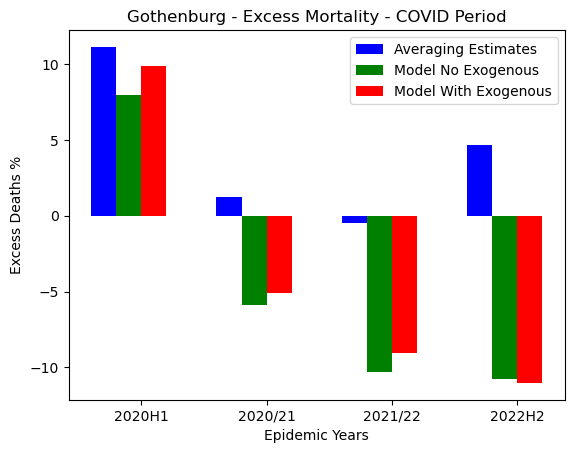

In [98]:


goth_actual_deaths_total_20 = np.sum(goth_actual_deaths_20)
lin_ests_excess_20 = (goth_actual_deaths_total_20 - np.sum(lin_ests_20))/goth_actual_deaths_total_20 *100
goth_NoCom_NoExog_excess_total_20 = (goth_actual_deaths_total_20 - np.sum(goth_NoCom_NoExog_deaths_20))/goth_actual_deaths_total_20 *100
goth_NoCom_WithExog_excess_total_20 = (goth_actual_deaths_total_20 - np.sum(goth_NoCom_WithExog_deaths_20))/goth_actual_deaths_total_20 *100

goth_actual_deaths_total_20_21 = np.sum(goth_actual_deaths_20_21)
lin_ests_excess_20_21 = (goth_actual_deaths_total_20_21 - np.sum(lin_ests_20_21))/goth_actual_deaths_total_20_21 *100
goth_NoCom_NoExog_excess_total_20_21 = (goth_actual_deaths_total_20_21 - np.sum(goth_NoCom_NoExog_deaths_20_21))/goth_actual_deaths_total_20_21 *100
goth_NoCom_WithExog_excess_total_20_21 = (goth_actual_deaths_total_20_21 - np.sum(goth_NoCom_WithExog_deaths_20_21))/goth_actual_deaths_total_20_21 *100

goth_actual_deaths_total_21_22 = np.sum(goth_actual_deaths_21_22)
lin_ests_excess_21_22 = (goth_actual_deaths_total_21_22 - np.sum(lin_ests_21_22))/goth_actual_deaths_total_21_22 *100
goth_NoCom_NoExog_excess_total_21_22 = (goth_actual_deaths_total_21_22 - np.sum(goth_NoCom_NoExog_deaths_21_22))/goth_actual_deaths_total_21_22 *100
goth_NoCom_WithExog_excess_total_21_22 = (goth_actual_deaths_total_21_22 - np.sum(goth_NoCom_WithExog_deaths_21_22))/goth_actual_deaths_total_21_22 *100

goth_actual_deaths_total_22 = np.sum(goth_actual_deaths_22)
lin_ests_excess_22 = (goth_actual_deaths_total_22 - np.sum(lin_ests_22))/goth_actual_deaths_total_22 *100
goth_NoCom_NoExog_excess_total_22 = (goth_actual_deaths_total_22 - np.sum(goth_NoCom_NoExog_deaths_22))/goth_actual_deaths_total_22 *100
goth_NoCom_WithExog_excess_total_22 = (goth_actual_deaths_total_22 - np.sum(goth_NoCom_WithExog_deaths_22))/goth_actual_deaths_total_22 *100


# Assuming goth_logmort_full, lin_ests_20, goth_actual_deaths_20, goth_NoCom_NoExog_deaths_20, and goth_NoCom_WithExog_deaths_20 are defined
# goth_logmort_full.index should be a list or an array of age groups

years = ["2020H1", "2020/21","2021/22", "2022H2"]
r = np.arange(len(years))
width = 0.2  # Adjusting width to fit four bars

# Labels for the legends
labels = ["Averaging Estimates", "Model No Exogenous", "Model With Exogenous","_nolegend_"]

plt.bar(r[0] - 1.5*width, lin_ests_excess_20, width=0.2, align="center", color="blue", label=labels[0])
plt.bar(r[0] - 0.5*width, goth_NoCom_NoExog_excess_total_20, width=0.2, align="center", color="green", label=labels[1])
plt.bar(r[0] + 0.5*width, goth_NoCom_WithExog_excess_total_20, width=0.2, align="center", color="red", label=labels[2])
#plt.bar(r[0] + 1.5*width, goth_actual_deaths_total_20, width=0.2, align="center", color="orange", label=labels[0])

plt.bar(r[1] - 1.5*width, lin_ests_excess_20_21, width=0.2, align="center", color="blue", label=labels[3])
plt.bar(r[1] - 0.5*width, goth_NoCom_NoExog_excess_total_20_21, width=0.2, align="center", color="green", label=labels[3])
plt.bar(r[1] + 0.5*width, goth_NoCom_WithExog_excess_total_20_21, width=0.2, align="center", color="red", label=labels[3])
#plt.bar(r[1] + 1.5*width, goth_actual_deaths_total_20_21, width=0.2, align="center", color="orange", label=labels[0])

plt.bar(r[2] - 1.5*width, lin_ests_excess_21_22, width=0.2, align="center", color="blue", label=labels[3])
plt.bar(r[2] - 0.5*width, goth_NoCom_NoExog_excess_total_21_22, width=0.2, align="center", color="green", label=labels[3])
plt.bar(r[2] + 0.5*width, goth_NoCom_WithExog_excess_total_21_22, width=0.2, align="center", color="red", label=labels[3])

plt.bar(r[3] - 1.5*width, lin_ests_excess_22, width=0.2, align="center", color="blue", label=labels[3])
plt.bar(r[3] - 0.5*width, goth_NoCom_NoExog_excess_total_22, width=0.2, align="center", color="green", label=labels[3])
plt.bar(r[3] + 0.5*width, goth_NoCom_WithExog_excess_total_22, width=0.2, align="center", color="red", label=labels[3])

plt.xticks(r, years)
plt.legend()
plt.xlabel('Epidemic Years')
plt.ylabel('Excess Deaths %')
plt.title('Gothenburg - Excess Mortality - COVID Period');
# plt.show()



In [ ]:
k_t_models_sarw["model_1"].summary()